Arjun Joshi. Brainstation Capstone <br>
December, 2024<br>
Diploma Program: Data Science

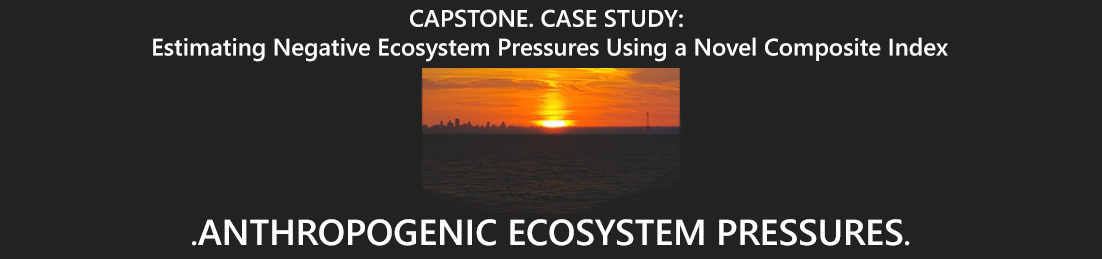

<html>
<style>
sup {
    vertical-align: super;
    font-size: smaller;
}
</style>
<p>
<sub><h3><center>Capstone. Case Study: Application of Anthropogenic WSM </center></h3></sub>
<sup></sup><h1> <center> Formation of SDI & Neural Net </
<sup><h3> .NEKTON AND BENTHIC ENVIRONMENTS. </h3></sup><center></center></h1>
</html>


**Note:** <br>

*If you have the required data and are executing the notebook, I'd do the following: <br>
Enable cell scrolling for the notebook. This makes it easier to view some output* 
*In order to do this*, 
- *select all cells (CTRL+A) outside of cell text right click and*
- *Select "Enable Scrolling For Outputs "*




### Import Scripts

In [10]:
import os

In [11]:
os.chdir('J:/Brainstation/BS Git/Tampa_Apollo_AnthropogenicIndex/notebooks')

In [12]:
%run scripts/DataDictionary.py
%run scripts/imports.py
%run scripts/imports.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### Read-in Main Data Tables

##### Benthic Data

In [13]:
os.chdir('J:\\Brainstation\\BS Git\\PossibleDataSources\\Benthic Index\\Results') 

In [14]:
benthic_tbbi=pd.read_csv('bBioAdj_1.csv',encoding='cp1252', low_memory=False)

##### Pelagic Data

In [15]:
os.chdir('J:\\Brainstation\\BS Git\\PossibleDataSources\\nekton')

In [16]:
nekton_tbni=pd.read_csv('Nekton.csv')

In [17]:
nekton_tbni.head(2)

,Reference,StartDepth,BottomVegCover,BycatchQuantity,slope,ScoreNumTaxa,ScoreShannon,ScoreTaxaSelect,ScoreTaxaBenthic,ScoreNumGuilds,...,FLUCCSCODE,areas,bottom,DominantVeg,bveg,Shore,bay_TBEPseg_season,bay_TBEPseg_sgyr,bay_TBEPseg_sgyr_season,BvegCovBin
0,TBM1998010906,0.6,0.0,0.0,0.0,2,2,0,0,5,...,NaN,22.0,MudSan,NaN,Non,ManTer,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
1,TBM1998010910,0.8,0.0,0.0,0.0,1,0,3,1,2,...,NaN,21.0,MudSan,NaN,Non,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25


##### Nitrates Data

In [18]:
os.chdir('J:\\Brainstation\\BS Git\\human Imact\\Nutrient_loading')

In [19]:
VAR_data=pd.read_csv('Nitrates_VAR_organics.csv')

In [20]:
VAR_data.columns=['date','ResultValue_K','ResultValue_A','ResultValue_N','ResultValue_O']

##### Developmemnt

In [21]:
os.chdir('J:\\Brainstation\\BS Git\\human Imact\\Population Data')

In [22]:
dev=pd.read_csv('construction.csv')

In [23]:
change=pd.read_csv('percentchange_dev.csv')

##### Population

In [24]:
pop=pd.read_csv('population_data.csv')

### A little preprocessing

### Nitrate/Phosphate Comparison**

** The data sets used for this proof of concept for the API index initially included phosphates in its evaluation of run-off and nuitrient loading in the bay.
Unlike Nitrate which can be separated if you have values for ammonia (Organics=Kjeldahl-Ammonia), Phosphates can't be separated given the dataset

In [25]:
NP_Means

NameError: name 'NP_Means' is not defined

In [ ]:
NP_Means.rename(columns={'ResultValue2':'Nit'},inplace=True)

In [26]:
NP_Means.info()

NameError: name 'NP_Means' is not defined

In [27]:
NP_means=NP_Means.iloc[:,[1,2,3,4,11,5,6,7]]

NameError: name 'NP_Means' is not defined

In [28]:
NP_means

NameError: name 'NP_means' is not defined

In [29]:
catch_freq_stage_merged.year.unique()

NameError: name 'catch_freq_stage_merged' is not defined

<Axes: >

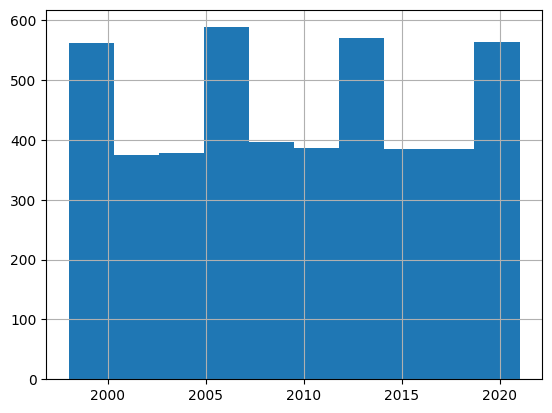

In [30]:
nekton_tbni.year.hist()

In [31]:
"""
Key Tables:
NP_means
"""

'\nKey Tables:\nNP_means\n'

In [32]:
catch_sel_vals

NameError: name 'catch_sel_vals' is not defined

In [515]:
ym=catch_sel_vals.sgyear.astype(str)+'_'+catch_sel_vals.month.astype(str)

In [516]:
ym.unique()

array(['1999_1', '1999_2', '1999_3', '1999_4', '1999_5', '1999_6',
       '1999_7', '1999_8', '1999_9', '1999_10', '1999_11', '1999_12',
       '2001_1', '2001_2', '2001_3', '2001_4', '2001_5', '2001_6',
       '2001_7', '2001_8', '2001_9', '2001_10', '2001_11', '2001_12',
       '2004_1', '2004_2', '2004_3', '2004_4', '2004_5', '2004_6',
       '2004_7', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12',
       '2006_1', '2006_2', '2006_3', '2006_4', '2006_5', '2006_6',
       '2006_7', '2006_8', '2006_9', '2006_10', '2006_11', '2006_12',
       '2008_1', '2008_2', '2008_3', '2008_4', '2008_5', '2008_6',
       '2008_7', '2008_8', '2008_9', '2008_10', '2008_11', '2008_12',
       '2010_1', '2010_2', '2010_3', '2010_4', '2010_5', '2010_6',
       '2010_7', '2010_8', '2010_9', '2010_10', '2010_11', '2010_12',
       '2012_1', '2012_2', '2012_3', '2012_4', '2012_5', '2012_6',
       '2012_7', '2012_8', '2012_9', '2012_10', '2012_11', '2012_12',
       '2014_1', '2014_2', '2014_3', '201

In [517]:
catch_sel_vals.sgyear.unique()

array([1999, 2001, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020,
       2022], dtype=int64)

** Sampling intervals for benthic data was not even. Data is taken both seasonally and at 2-3 year interals.
  This willmake it harder to draw direct comparisons with other datasets. **

In [518]:


vals_1999=catch_sel_vals[catch_sel_vals['sgyear']==1999]

In [519]:
SDI_means=catch_sel_vals.groupby(['month','sgyear']).shannon.mean().reset_index().sort_values(by=['sgyear','month'])

In [789]:
SDI_means

,month,sgyear,shannon
0,1,1999,0.489115
12,2,1999,0.859081
24,3,1999,0.825866
36,4,1999,0.783379
48,5,1999,0.894913
...,...,...,...
95,8,2022,0.985419
107,9,2022,1.037126
119,10,2022,0.909193
131,11,2022,0.818095


In [521]:
years=SDI_means.sgyear.unique()

In [522]:
SDI_means_2=SDI_means.copy()
SDI_means_2.head(3)

,month,sgyear,shannon
0,1,1999,0.489115
12,2,1999,0.859081
24,3,1999,0.825866


In [523]:
ddyear_counter=1

In [524]:
SDI_means_2.sgyear=SDI_means_2.sgyear.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

In [525]:
SDI_means_2

,month,sgyear,shannon
0,1,1,0.489115
12,2,1,0.859081
24,3,1,0.825866
36,4,1,0.783379
48,5,1,0.894913
...,...,...,...
95,8,12,0.985419
107,9,12,1.037126
119,10,12,0.909193
131,11,12,0.818095


In [526]:
SDI_means_2

,month,sgyear,shannon
0,1,1,0.489115
12,2,1,0.859081
24,3,1,0.825866
36,4,1,0.783379
48,5,1,0.894913
...,...,...,...
95,8,12,0.985419
107,9,12,1.037126
119,10,12,0.909193
131,11,12,0.818095


<Axes: xlabel='month', ylabel='shannon'>

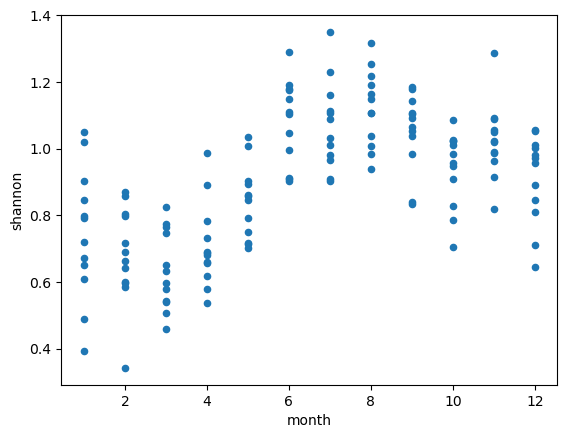

In [527]:
SDI_means.plot('month','shannon',kind='scatter')

In [528]:
monthly_average_sdi=SDI_means.groupby('month').shannon.mean()

In [529]:
monthly_average=pd.DataFrame(monthly_average_sdi.reset_index())
monthly_average

,month,shannon
0,1,0.745361
1,2,0.680621
2,3,0.635257
3,4,0.708820
4,5,0.840306
5,6,1.080407
6,7,1.071142
7,8,1.122901
8,9,1.052118
9,10,0.940210


C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1446467906.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1446467906.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



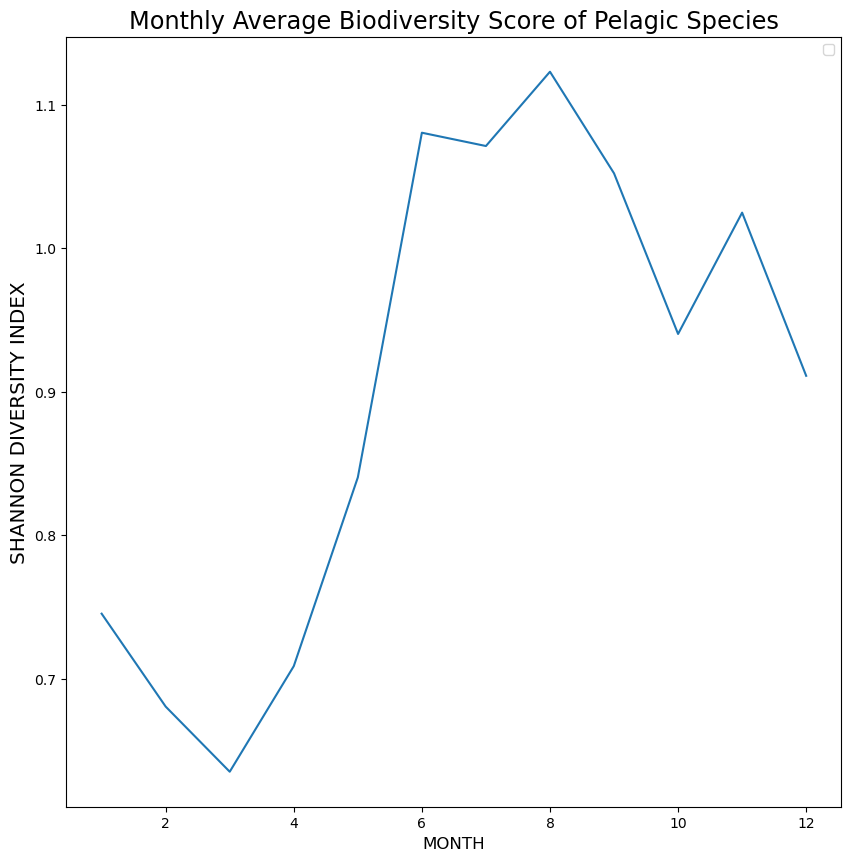

In [530]:
plt.figure(figsize=(10,10))
sns.lineplot(x='month',y='shannon',data=monthly_average,palette='viridis')
plt.title('Monthly Average Biodiversity Score of Pelagic Species',fontsize='xx-large')
plt.xlabel('MONTH',fontsize='large')
plt.ylabel('SHANNON DIVERSITY INDEX', fontsize='x-large')
plt.legend()
plt.show()

Matching up SDI values from Nekton with Benthic SDI valiues

In [531]:
SDI_means_2['monthyr']=SDI_means_2.month.astype(str)+'_'+SDI_means_2.sgyear.astype(str)
SDI_means_2['ym']=SDI_means_2.sgyear.astype(str)+'_'+SDI_means_2.month.astype(str)
SDI_means_2

,month,sgyear,shannon,monthyr,ym
0,1,1,0.489115,1_1,1_1
12,2,1,0.859081,2_1,1_2
24,3,1,0.825866,3_1,1_3
36,4,1,0.783379,4_1,1_4
48,5,1,0.894913,5_1,1_5
...,...,...,...,...,...
95,8,12,0.985419,8_12,12_8
107,9,12,1.037126,9_12,12_9
119,10,12,0.909193,10_12,12_10
131,11,12,0.818095,11_12,12_11


In [532]:
# Have to match on separate years

In [533]:
benX_match_nekton=benX_sindex[benX_sindex.Year.isin(years)]

In [534]:
benX_match_nekton

,Year,month,AreaAbbr,ShannonDiversity,Temp-T,Temp-B,ym
73,1999,8,AR,0.466296,29.028519,29.180000,1999-8
74,1999,8,HR,0.569000,28.804500,29.049500,1999-8
75,1999,8,PR,0.201000,30.941000,30.619500,1999-8
76,1999,8,TCB,0.517500,31.500000,31.250000,1999-8
77,1999,9,AR,0.486154,29.002308,29.672308,1999-9
...,...,...,...,...,...,...,...
392,2022,8,LTB,0.519500,30.422000,30.467500,2022-8
393,2022,8,MTB,0.542500,30.166250,30.077500,2022-8
394,2022,8,OTB,0.510000,30.475714,30.305714,2022-8
395,2022,9,MR,0.618750,29.317500,28.842500,2022-9


In [535]:
# Map sampling years to a simple sequence format in order to create a continuous plot
# Although this might demonstrate a pattern, it's unlikely this data can applied to a time series analysis
benX_match_nekton['year_seq']=benX_match_nekton.Year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\4148177043.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [536]:
benX_match_nekton

,Year,month,AreaAbbr,ShannonDiversity,Temp-T,Temp-B,ym,year_seq
73,1999,8,AR,0.466296,29.028519,29.180000,1999-8,1
74,1999,8,HR,0.569000,28.804500,29.049500,1999-8,1
75,1999,8,PR,0.201000,30.941000,30.619500,1999-8,1
76,1999,8,TCB,0.517500,31.500000,31.250000,1999-8,1
77,1999,9,AR,0.486154,29.002308,29.672308,1999-9,1
...,...,...,...,...,...,...,...,...
392,2022,8,LTB,0.519500,30.422000,30.467500,2022-8,12
393,2022,8,MTB,0.542500,30.166250,30.077500,2022-8,12
394,2022,8,OTB,0.510000,30.475714,30.305714,2022-8,12
395,2022,9,MR,0.618750,29.317500,28.842500,2022-9,12


In [537]:
#year_seq=pd.Series()

In [538]:
year_seq=benX_match_nekton['year_seq'].astype(int)

In [539]:
benX_match_nekton['year_seq_month']=benX_match_nekton.year_seq.astype(str)+'_'+benX_match_nekton.month.astype(str)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\3808030496.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [540]:
benX_AreaMean=benX_match_nekton.groupby(['Year','month','year_seq_month']).ShannonDiversity.mean().reset_index()

In [541]:
benX_AreaMean.head(3)

,Year,month,year_seq_month,ShannonDiversity
0,1999,8,1_8,0.438449
1,1999,9,1_9,0.558688
2,1999,10,1_10,0.586418


In [542]:
benX_yrmonth=benX_match_nekton.year_seq.astype(str)+'_'+benX_match_nekton.month.astype(str)

In [543]:
benX_match_nekton.head(3)

,Year,month,AreaAbbr,ShannonDiversity,Temp-T,Temp-B,ym,year_seq,year_seq_month
73,1999,8,AR,0.466296,29.028519,29.1800,1999-8,1,1_8
74,1999,8,HR,0.569000,28.804500,29.0495,1999-8,1,1_8
75,1999,8,PR,0.201000,30.941000,30.6195,1999-8,1,1_8


In [544]:
benX_AreaMean

,Year,month,year_seq_month,ShannonDiversity
0,1999,8,1_8,0.438449
1,1999,9,1_9,0.558688
2,1999,10,1_10,0.586418
3,2001,5,2_5,0.571034
4,2001,7,2_7,0.418125
5,2001,8,2_8,0.532607
6,2001,9,2_9,0.536389
7,2001,10,2_10,0.580000
8,2004,3,3_3,0.640000
9,2004,4,3_4,0.590667


Introducting Nitrates and Phosphates and matching with benthic data

In [56]:
#############
NP_means
#############
## Sequencing years for Nit-Phos

NameError: name 'NP_means' is not defined

In [546]:
NP_means['year_seq']=NP_means.year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\3799716401.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [547]:
##Create a matching table for Nekton/Benthic
NP_match=NP_means[NP_means.year.isin(years)]

In [548]:
print(NP_match.shape)
print(SDI_means_2.shape)
benX_AreaMean.shape

(144, 9)
(144, 5)


(41, 4)

In [549]:
benX_sindex.Year.value_counts().count()

30

In [550]:
# formatting for matching
NP_match.year_seq=NP_match.year_seq.astype(int)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\3603738672.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [551]:
NP_match['ym_seq']=NP_match.year_seq.astype(str)+'_'+NP_match.month.astype(str)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1873409731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [552]:
NP_match.reset_index(drop=True,inplace=True)
SDI_means_2.reset_index(drop=True,inplace=True)
NP_match

,year,month,ym,Nit,Phos,ActivityDepth,Latitude,Longitude,year_seq,ym_seq
0,1999,1,1999_1,0.642960,0.155000,1.430417,27.818557,-82.497083,1,1_1
1,1999,2,1999_2,0.516667,0.217500,0.971111,27.812085,-82.487398,1,1_2
2,1999,3,1999_3,0.589455,0.227500,0.881905,27.803355,-82.518752,1,1_3
3,1999,4,1999_4,0.621739,0.248571,1.461739,27.823980,-82.498598,1,1_4
4,1999,5,1999_5,0.725000,0.171818,1.437778,27.816501,-82.488693,1,1_5
...,...,...,...,...,...,...,...,...,...,...
139,2022,8,2022_8,0.413314,0.121000,1.568571,27.798501,-82.522758,12,12_8
140,2022,9,2022_9,0.440909,0.241167,1.513636,27.798483,-82.520057,12,12_9
141,2022,10,2022_10,0.349529,0.376714,1.497059,27.790141,-82.519279,12,12_10
142,2022,11,2022_11,0.515480,0.114714,1.782000,27.804925,-82.486603,12,12_11


In [610]:
NP_nekton=pd.concat([NP_match,SDI_means_2.shannon],axis=1)
NP_nekton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           144 non-null    int64  
 1   month          144 non-null    int64  
 2   ym             144 non-null    object 
 3   Nit            144 non-null    float64
 4   Phos           144 non-null    float64
 5   ActivityDepth  144 non-null    float64
 6   Latitude       144 non-null    float64
 7   Longitude      144 non-null    float64
 8   year_seq       144 non-null    int32  
 9   ym_seq         144 non-null    object 
 10  shannon        144 non-null    float64
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 11.9+ KB


In [611]:
NP_nekton.index=NP_nekton.ym

In [612]:
NP_nekton.head(2)

,year,month,ym,Nit,Phos,ActivityDepth,Latitude,Longitude,year_seq,ym_seq,shannon
ym,,,,,,,,,,,
1999_1,1999,1,1999_1,0.642960,0.1550,1.430417,27.818557,-82.497083,1,1_1,0.489115
1999_2,1999,2,1999_2,0.516667,0.2175,0.971111,27.812085,-82.487398,1,1_2,0.859081


In [613]:
NP_nekton['day']=1

In [616]:
NP_nekton['date_format']=pd.to_datetime(NP_nekton.month.astype('str')+'-'+NP_nekton.day.astype('str')+'-'+NP_nekton.year.astype('str'))

In [623]:
NP_nekton.head()

,year,month,ym,Nit,Phos,ActivityDepth,Latitude,Longitude,year_seq,ym_seq,shannon,day,date_format
1999-01-01,1999,1,1999_1,0.642960,0.155000,1.430417,27.818557,-82.497083,1,1_1,0.489115,1,1999-01-01
1999-02-01,1999,2,1999_2,0.516667,0.217500,0.971111,27.812085,-82.487398,1,1_2,0.859081,1,1999-02-01
1999-03-01,1999,3,1999_3,0.589455,0.227500,0.881905,27.803355,-82.518752,1,1_3,0.825866,1,1999-03-01
1999-04-01,1999,4,1999_4,0.621739,0.248571,1.461739,27.823980,-82.498598,1,1_4,0.783379,1,1999-04-01
1999-05-01,1999,5,1999_5,0.725000,0.171818,1.437778,27.816501,-82.488693,1,1_5,0.894913,1,1999-05-01


In [622]:
NP_nekton.index=NP_nekton.date_format

In [625]:
NP_nekton=NP_nekton.iloc[:,[3,4,10]]

In [627]:
NP_nekton.head(2)

,Nit,Phos,shannon
1999-01-01,0.642960,0.1550,0.489115
1999-02-01,0.516667,0.2175,0.859081


In [628]:
NP_means.head(2)

,year,month,ym,Nit,Phos,ActivityDepth,Latitude,Longitude,year_seq,date_format
0,1990,1,1990_1,0.68275,0.525385,2.31925,27.795134,-82.504102,NaN,1990-01-01
1,1990,2,1990_2,0.84775,0.534000,2.45125,27.792931,-82.504449,NaN,1990-02-01


In [629]:
import scipy.stats as stats
stats.ttest_rel(NP_means.Nit,NP_means.Phos)

TtestResult(statistic=26.69831956761394, pvalue=3.967183052940055e-92, df=415)

<Axes: >

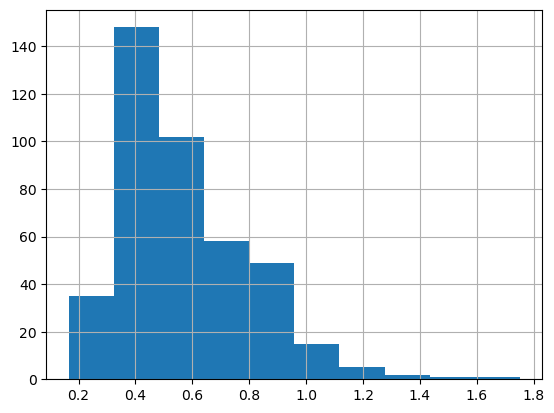

In [630]:
NP_means.Nit.hist()

<Axes: >

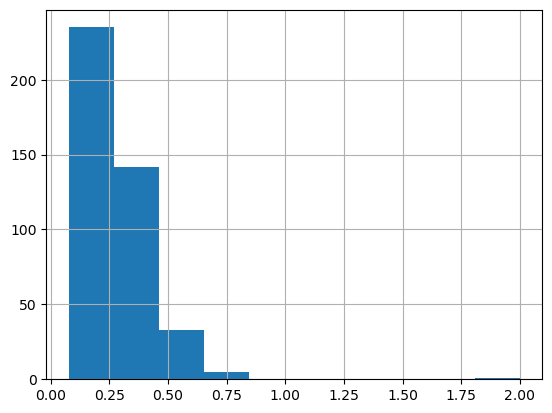

In [631]:
NP_means.Phos.hist()

In [632]:
Nitdecomp=pd.DataFrame(data=NP_means.Nit,index=NP_means.date_format)

In [633]:
Nitdecomp.Nit=NP_means.Nit

In [634]:
NP_means.Nit

0      0.682750
1      0.847750
2      0.641500
3      0.630976
4      0.676829
         ...   
411    0.442958
412    0.330565
413    0.355957
414    0.182000
415    0.189706
Name: Nit, Length: 416, dtype: float64

In [635]:
NP_means.Phos

0      0.525385
1      0.534000
2      0.469091
3      0.529375
4      0.649000
         ...   
411    0.129429
412    0.111750
413    0.112889
414    0.124333
415    0.342667
Name: Phos, Length: 416, dtype: float64

In [636]:
decomp_N=pd.DataFrame(data=NP_means.Nit,index=NP_means.date_format)
decomp_P=pd.DataFrame(data=NP_means.Phos,index=NP_means.date_format)
decomp_N.index.name=''
decomp_P.index.name=''

In [637]:
decomp_N=NP_means.Nit.to_frame()
decomp_P=NP_means.Phos.to_frame()

In [638]:
decomp_P.index=NP_means.date_format
decomp_P

,Phos
date_format,
1990-01-01,0.525385
1990-02-01,0.534000
1990-03-01,0.469091
1990-04-01,0.529375
1990-05-01,0.649000
...,...
2024-04-01,0.129429
2024-05-01,0.111750
2024-06-01,0.112889


In [639]:
#decomp_P.drop(columns=['trend','residual','seasonal'],inplace=True)

KeyError: "['trend', 'residual', 'seasonal'] not found in axis"

In [641]:
decomp_P

,Phos
date_format,
1990-01-01,0.525385
1990-02-01,0.534000
1990-03-01,0.469091
1990-04-01,0.529375
1990-05-01,0.649000
...,...
2024-04-01,0.129429
2024-05-01,0.111750
2024-06-01,0.112889


In [642]:
decomp_N.index=NP_means.date_format
decomp_N.index.name=''
decomp_N

,Nit
,
1990-01-01,0.682750
1990-02-01,0.847750
1990-03-01,0.641500
1990-04-01,0.630976
1990-05-01,0.676829
...,...
2024-04-01,0.442958
2024-05-01,0.330565
2024-06-01,0.355957


In [643]:
#decomp_P.drop(columns=['trend','residual','seasonal'],inplace=True)
decomp_P

,Phos
date_format,
1990-01-01,0.525385
1990-02-01,0.534000
1990-03-01,0.469091
1990-04-01,0.529375
1990-05-01,0.649000
...,...
2024-04-01,0.129429
2024-05-01,0.111750
2024-06-01,0.112889


In [650]:
#decomp_N.drop(columns=['trend','residual','seasonal'],inplace=True)
decomp_N

,Nit,seasonal,trend,residual
,,,,
1990-01-01,0.682750,0.820513,NaN,NaN
1990-02-01,0.847750,0.886040,NaN,NaN
1990-03-01,0.641500,0.931119,NaN,NaN
1990-04-01,0.630976,0.958353,NaN,NaN
1990-05-01,0.676829,0.958778,NaN,NaN
...,...,...,...,...
2024-04-01,0.442958,0.958353,NaN,NaN
2024-05-01,0.330565,0.958778,NaN,NaN
2024-06-01,0.355957,1.072969,NaN,NaN


In [645]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [646]:
decomposition_N=seasonal_decompose(decomp_N,model='multiplicative')
decomposition_P=seasonal_decompose(decomp_P,model='multiplicative')

In [647]:
decomp_P['seasonal']=decomposition_P.seasonal
decomp_P['trend']=decomposition_P.trend
decomp_P['residual']=decomposition_P.resid

In [648]:
decomp_N['seasonal']=decomposition_N.seasonal
decomp_N['trend']=decomposition_N.trend
decomp_N['residual']=decomposition_N.resid

In [649]:
cols = ["trend", "seasonal", "residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=decomp_N.index, y=decomp_N[col],name='Nitrates'),
        row=i+1,
        col=1
    )
    fig.add_trace(
        go.Scatter(x=decomp_P.index, y=decomp_P[col],name='Phosphates'),
        row=i+1,
        col=1
    )

fig.update_layout(
    height=700,
    width=1000,
    showlegend=True,
    title=dict(text="Nitrate and Phosphate Time Series Decomposition"),
    font=dict(size=12),
#    yref='paper'
)

fig.update_traces(
    line=dict(dash="solid", width=2.5), line_shape='linear'
    )

#fig.suptitle()
fig.show()

In [575]:
NP_nekton

,Nit,Phos,shannon
ym,,,
1999_1,0.642960,0.155000,0.489115
1999_2,0.516667,0.217500,0.859081
1999_3,0.589455,0.227500,0.825866
1999_4,0.621739,0.248571,0.783379
1999_5,0.725000,0.171818,0.894913
...,...,...,...
2022_8,0.413314,0.121000,0.985419
2022_9,0.440909,0.241167,1.037126
2022_10,0.349529,0.376714,0.909193


In [575]:
NP_nekton

,Nit,Phos,shannon
ym,,,
1999_1,0.642960,0.155000,0.489115
1999_2,0.516667,0.217500,0.859081
1999_3,0.589455,0.227500,0.825866
1999_4,0.621739,0.248571,0.783379
1999_5,0.725000,0.171818,0.894913
...,...,...,...
2022_8,0.413314,0.121000,0.985419
2022_9,0.440909,0.241167,1.037126
2022_10,0.349529,0.376714,0.909193


In [651]:
NP_nekton

,Nit,Phos,shannon
1999-01-01,0.642960,0.155000,0.489115
1999-02-01,0.516667,0.217500,0.859081
1999-03-01,0.589455,0.227500,0.825866
1999-04-01,0.621739,0.248571,0.783379
1999-05-01,0.725000,0.171818,0.894913
...,...,...,...
2022-08-01,0.413314,0.121000,0.985419
2022-09-01,0.440909,0.241167,1.037126
2022-10-01,0.349529,0.376714,0.909193
2022-11-01,0.515480,0.114714,0.818095


In [654]:
SDI_means_2

,month,sgyear,shannon,monthyr,ym
0,1,1,0.489115,1_1,1_1
1,2,1,0.859081,2_1,1_2
2,3,1,0.825866,3_1,1_3
3,4,1,0.783379,4_1,1_4
4,5,1,0.894913,5_1,1_5
...,...,...,...,...,...
139,8,12,0.985419,8_12,12_8
140,9,12,1.037126,9_12,12_9
141,10,12,0.909193,10_12,12_10
142,11,12,0.818095,11_12,12_11


In [655]:
SDI_means_2['day']='01'

In [656]:
NP_match['day']='01'

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\1831465455.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [657]:
NP_match

,year,month,ym,Nit,Phos,ActivityDepth,Latitude,Longitude,year_seq,ym_seq,day
0,1999,1,1999_1,0.642960,0.155000,1.430417,27.818557,-82.497083,1,1_1,01
1,1999,2,1999_2,0.516667,0.217500,0.971111,27.812085,-82.487398,1,1_2,01
2,1999,3,1999_3,0.589455,0.227500,0.881905,27.803355,-82.518752,1,1_3,01
3,1999,4,1999_4,0.621739,0.248571,1.461739,27.823980,-82.498598,1,1_4,01
4,1999,5,1999_5,0.725000,0.171818,1.437778,27.816501,-82.488693,1,1_5,01
...,...,...,...,...,...,...,...,...,...,...,...
139,2022,8,2022_8,0.413314,0.121000,1.568571,27.798501,-82.522758,12,12_8,01
140,2022,9,2022_9,0.440909,0.241167,1.513636,27.798483,-82.520057,12,12_9,01
141,2022,10,2022_10,0.349529,0.376714,1.497059,27.790141,-82.519279,12,12_10,01
142,2022,11,2022_11,0.515480,0.114714,1.782000,27.804925,-82.486603,12,12_11,01


In [658]:
NP_match['date_format']=pd.to_datetime(NP_match.day.astype(str)+'-'+NP_match.month.astype(str)+'-'+NP_match.year.astype(str))

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\2789289662.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [659]:
SDI_means_2['date_format'] = pd.to_datetime(SDI_means_2.day.astype(str)+'-'+SDI_means_2.month.astype(str)+'-'+SDI_means_2.sgyear.astype(str))

C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\2849227202.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



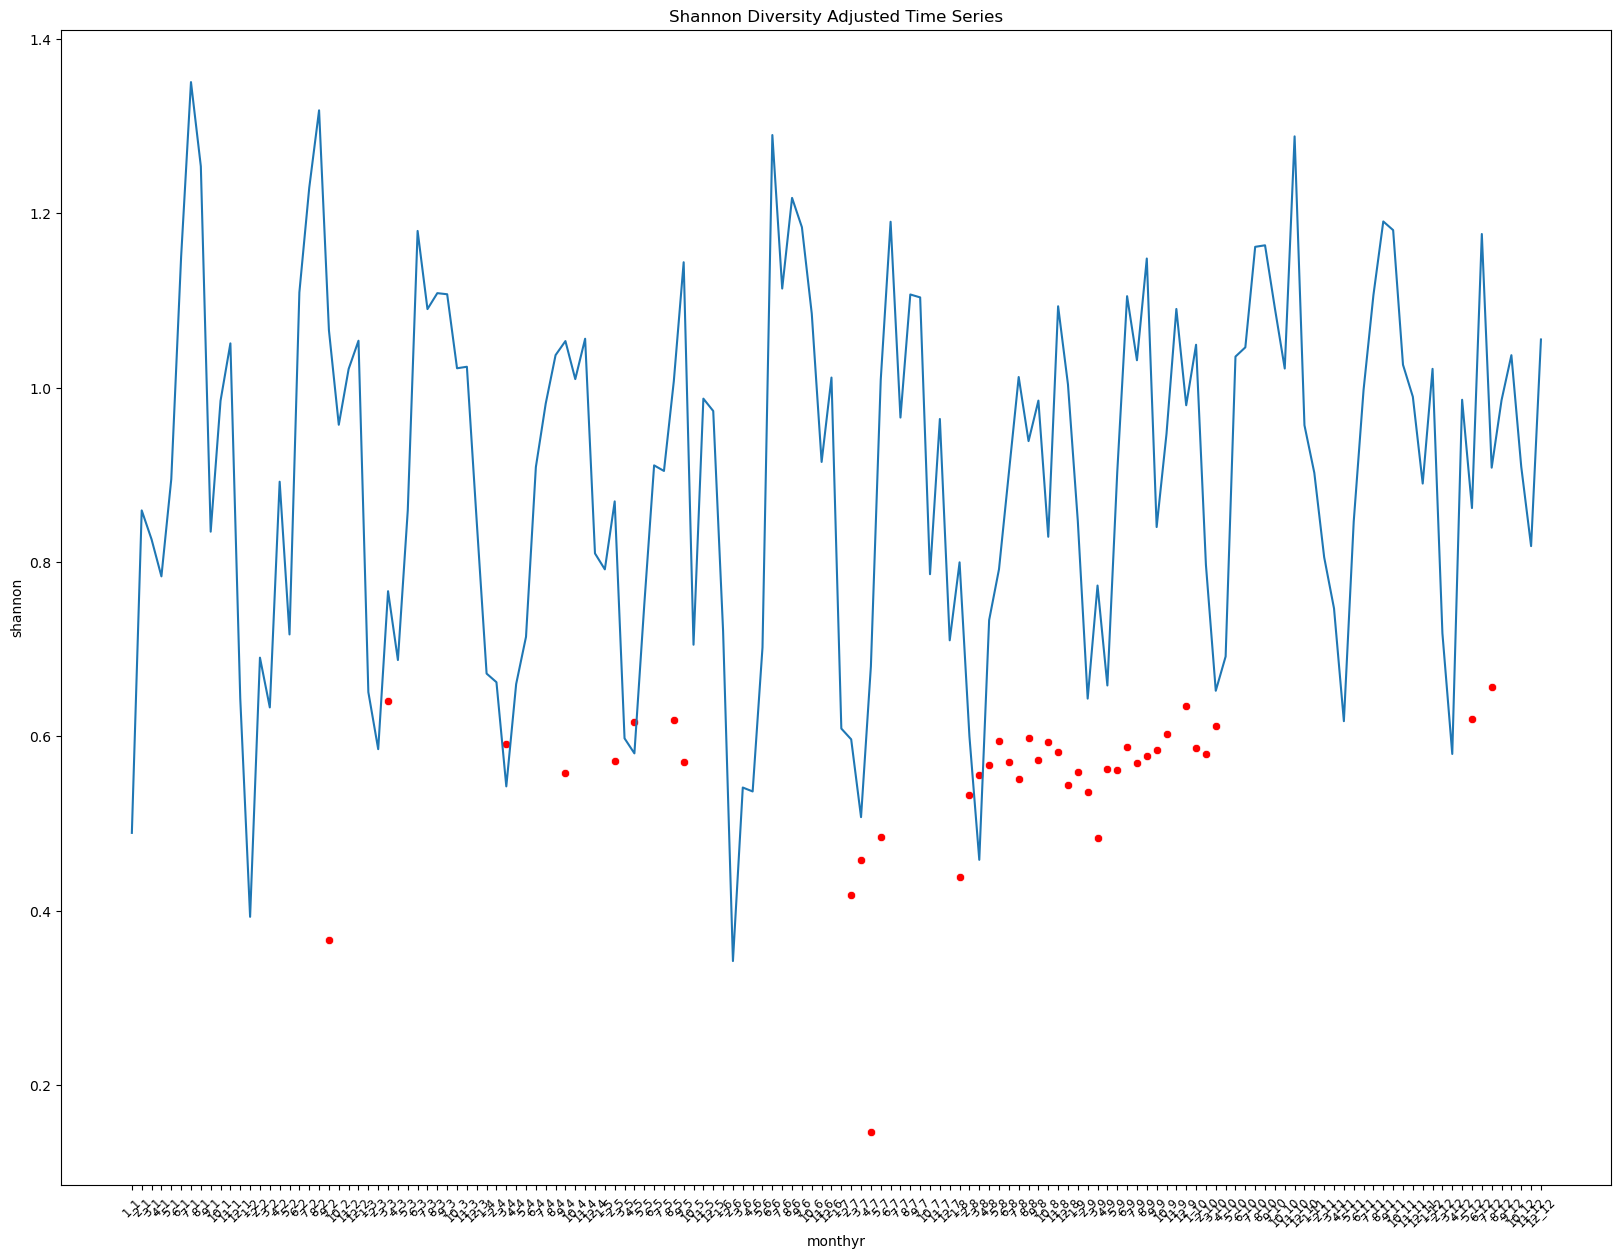

In [660]:
#plt.figure()
#sns.lineplot(x='monthyr',y='shannon',data=SDI_means_2,palette='viridis')
fig,ax=plt.subplots(figsize=(20,15))
plt.subplot()
sns.lineplot(x='monthyr',y='shannon',data=SDI_means_2,ax=ax)
plt.subplot()
sns.scatterplot(x='year_seq_month',y='ShannonDiversity', data=benX_AreaMean,color='red')
#plt.legend()
plt.xticks(rotation=45,fontsize='small')
plt.title('Shannon Diversity Adjusted Time Series')
plt.show()

In [661]:
benX_sindex['yrmon']=benX_sindex.month.astype(str)+'_'+benX_sindex.Year.astype(str)

In [87]:

benX_sindex[benX_sindex.Year.isin(years)].plot(x='ym',y='ShannonDiversity',title='Benthic SDI Adjusted for Sampling Schedule',figsize=(10,10))
plt.show()

NameError: name 'benX_sindex' is not defined

In [663]:
benX_sindex['year_seq']=benX_sindex.Year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

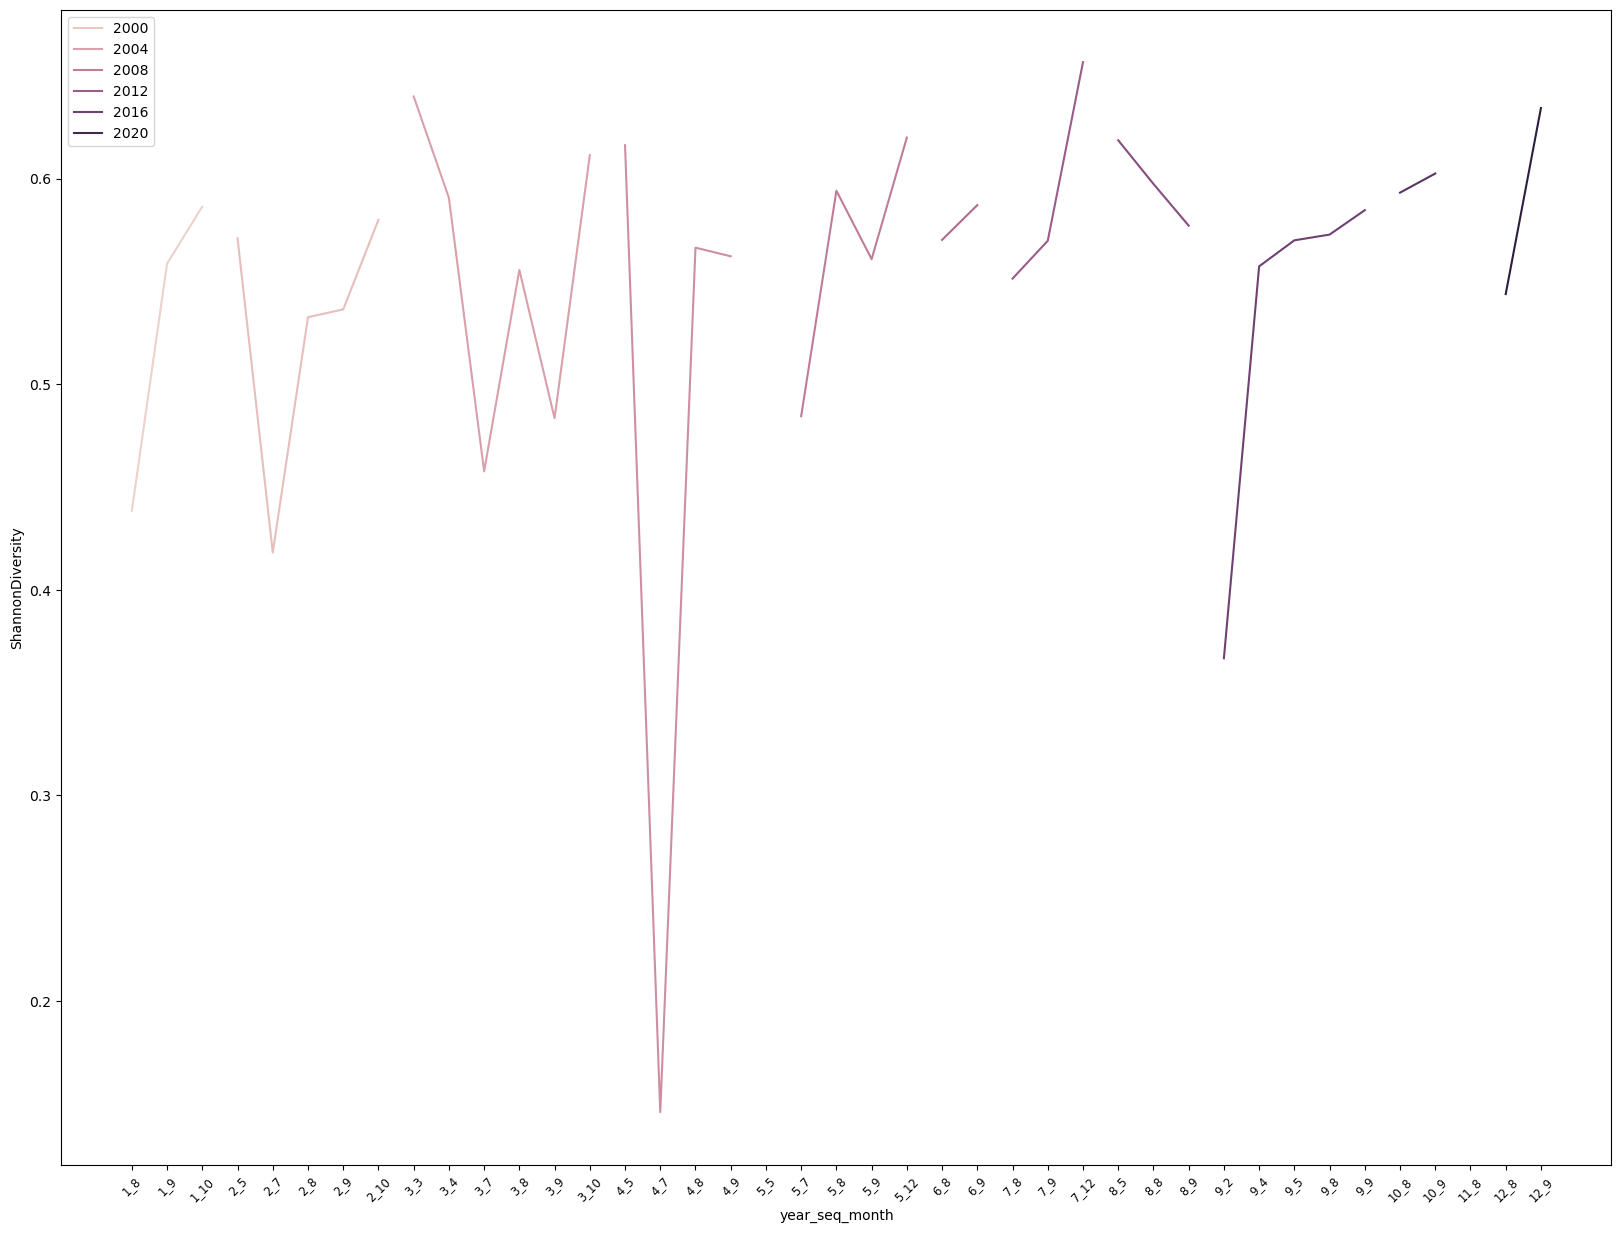

In [664]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year_seq_month',y='ShannonDiversity', data=benX_AreaMean , hue='Year')
plt.legend()
plt.xticks(rotation=45,fontsize='small')
plt.show()

In [665]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year_seq',y='shannon',data=SDI_means_2,palette='viridis')
plt.legend()1
plt.xticks(rotation=45,fontsize='small')
plt.show()

SyntaxError: invalid syntax (2218769775.py, line 3)

In [666]:
benX_AreaMean

,Year,month,year_seq_month,ShannonDiversity
0,1999,8,1_8,0.438449
1,1999,9,1_9,0.558688
2,1999,10,1_10,0.586418
3,2001,5,2_5,0.571034
4,2001,7,2_7,0.418125
5,2001,8,2_8,0.532607
6,2001,9,2_9,0.536389
7,2001,10,2_10,0.580000
8,2004,3,3_3,0.640000
9,2004,4,3_4,0.590667


In [667]:
shared_months=benX_match_nekton['year_seq_month']

In [668]:
SDI_means_2

,month,sgyear,shannon,monthyr,ym,day,date_format
0,1,1,0.489115,1_1,1_1,01,2001-01-01
1,2,1,0.859081,2_1,1_2,01,2001-01-02
2,3,1,0.825866,3_1,1_3,01,2001-01-03
3,4,1,0.783379,4_1,1_4,01,2001-01-04
4,5,1,0.894913,5_1,1_5,01,2001-01-05
...,...,...,...,...,...,...,...
139,8,12,0.985419,8_12,12_8,01,2012-01-08
140,9,12,1.037126,9_12,12_9,01,2012-01-09
141,10,12,0.909193,10_12,12_10,01,2012-01-10
142,11,12,0.818095,11_12,12_11,01,2012-01-11


In [669]:
benX_AreaMean[benX_AreaMean.year_seq_month.isin(shared_months)].shape

(41, 4)

In [670]:
test=SDI_means_2.merge(benX_AreaMean[benX_AreaMean.year_seq_month.isin(shared_months)], left_on='monthyr', right_on='year_seq_month')

<Axes: xlabel='year_seq_month'>

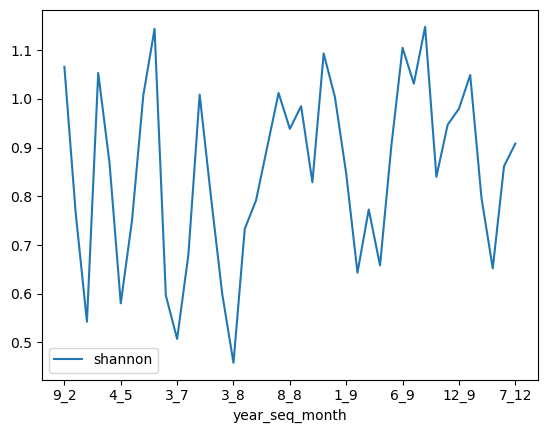

In [671]:
test.plot(x='year_seq_month',y='shannon')

In [672]:
test

,month_x,sgyear,shannon,monthyr,ym,day,date_format,Year,month_y,year_seq_month,ShannonDiversity
0,9,2,1.065691,9_2,2_9,01,2002-01-09,2016,2,9_2,0.366667
1,3,3,0.766389,3_3,3_3,01,2003-01-03,2004,3,3_3,0.640000
2,3,4,0.542445,3_4,4_3,01,2004-01-03,2004,4,3_4,0.590667
3,9,4,1.053323,9_4,4_9,01,2004-01-09,2016,4,9_4,0.557333
4,2,5,0.869411,2_5,5_2,01,2005-01-02,2001,5,2_5,0.571034
5,4,5,0.580332,4_5,5_4,01,2005-01-04,2006,5,4_5,0.616250
6,5,5,0.750458,5_5,5_5,01,2005-01-05,2008,5,5_5,NaN
7,8,5,1.007306,8_5,5_8,01,2005-01-08,2014,5,8_5,0.618667
8,9,5,1.143763,9_5,5_9,01,2005-01-09,2016,5,9_5,0.570000
9,2,7,0.596418,2_7,7_2,01,2007-01-02,2001,7,2_7,0.418125


C:\Users\Ajax\AppData\Local\Temp\ipykernel_30452\800347921.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



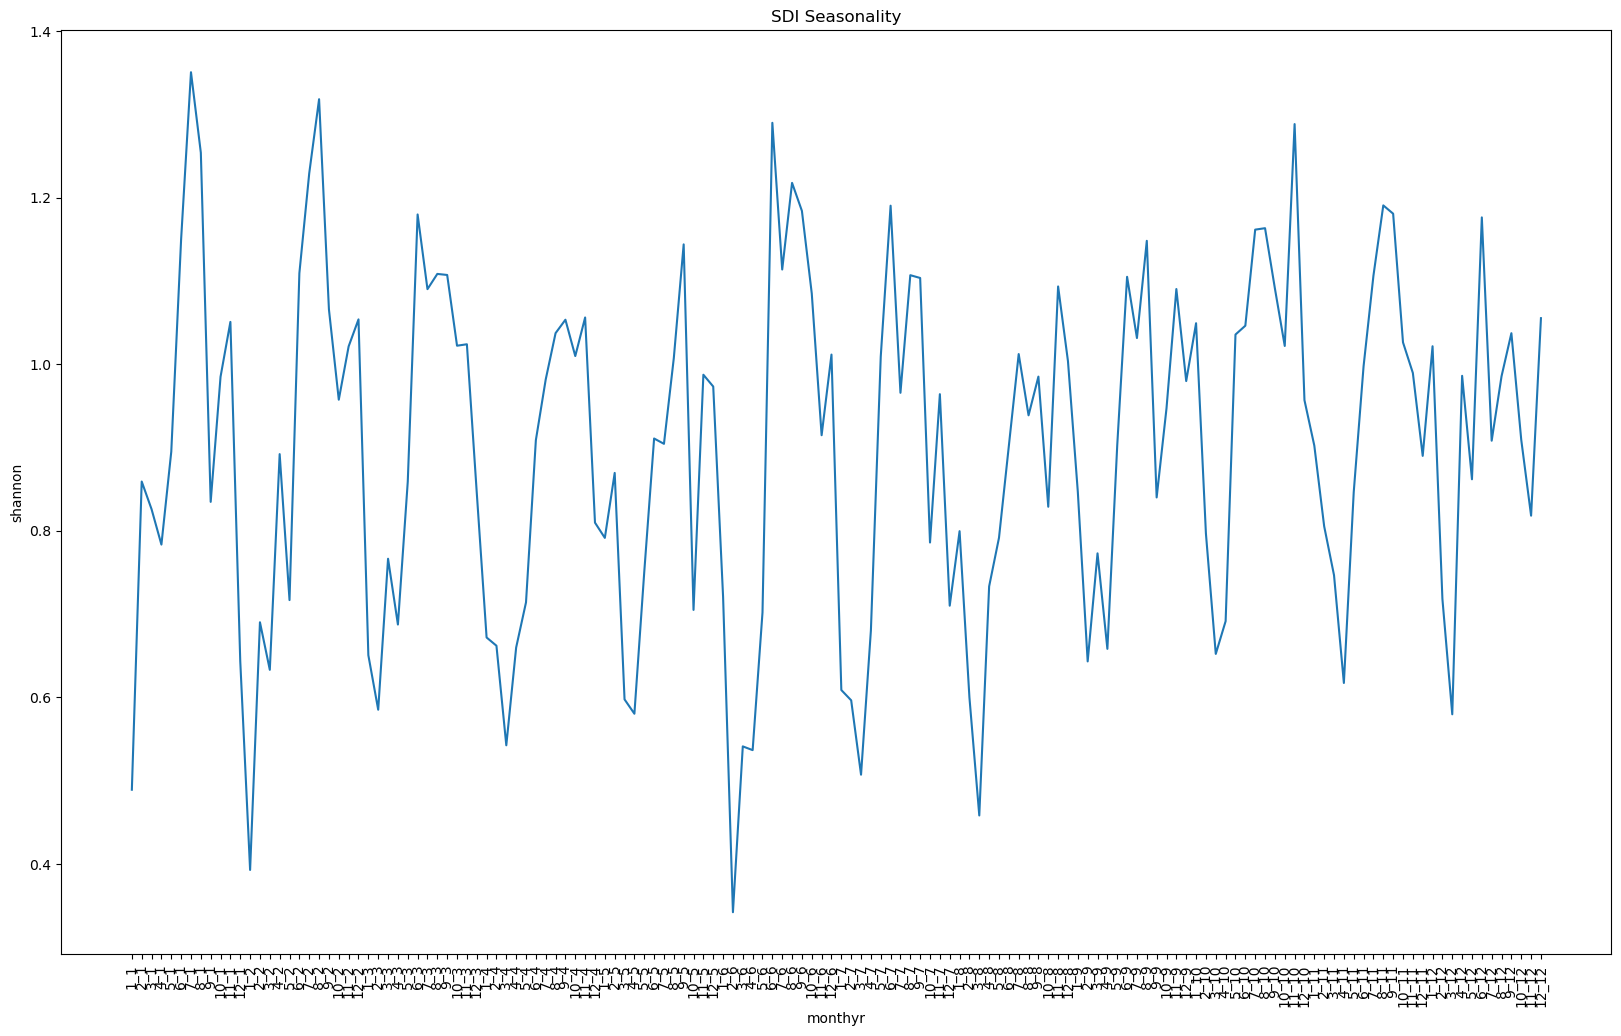

In [673]:
plt.figure(figsize=(20,12))
sns.lineplot(x='year_seq_month',y='ShannonDiversity', data=test,ax=ax)
sns.lineplot(x='monthyr',y='shannon',data=SDI_means_2,palette='viridis')
plt.xticks(rotation=90)
plt.title('SDI Seasonality')
plt.show()

In [40]:
nekton_tbni

,Reference,StartDepth,BottomVegCover,BycatchQuantity,slope,ScoreNumTaxa,ScoreShannon,ScoreTaxaSelect,ScoreTaxaBenthic,ScoreNumGuilds,...,FLUCCSCODE,areas,bottom,DominantVeg,bveg,Shore,bay_TBEPseg_season,bay_TBEPseg_sgyr,bay_TBEPseg_sgyr_season,BvegCovBin
0,TBM1998010906,0.6,0.0,0.0,0.0,2,2,0,0,5,...,NaN,22.0,MudSan,NaN,Non,ManTer,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
1,TBM1998010910,0.8,0.0,0.0,0.0,1,0,3,1,2,...,NaN,21.0,MudSan,NaN,Non,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
2,TBM1998010912,0.7,0.0,0.0,0.0,0,0,0,0,0,...,NaN,21.0,MudSan,NaN,Non,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
3,TBM1998010914,0.9,10.0,0.0,0.0,2,4,0,2,2,...,NaN,21.0,MudSan,Halodule spp.,SAV,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
4,TBM1998010915,0.5,0.0,0.0,0.0,4,7,3,4,5,...,9113.0,27.0,San,NaN,Non,Man,MTB_Winter,MTB_1999,MTB_1999 _Winter,0-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,TBM2021120704,1.0,0.0,0.1,NaN,3,4,0,3,5,...,NaN,8.0,MudSan,NaN,Non,Man,LTB_Winter,LTB_2022,LTB_2022 _Winter,0-25
4582,TBM2021120705,0.5,80.0,0.0,NaN,10,9,0,9,8,...,9116.0,8.0,Mud,Halodule spp.,SAV,Man,LTB_Winter,LTB_2022,LTB_2022 _Winter,76-100
4583,TBM2021120802,0.3,20.0,0.0,NaN,3,7,0,3,8,...,9116.0,16.0,SanStr,Thalassia spp.,SAV,Non,LTB_Winter,LTB_2022,LTB_2022 _Winter,0-25
4584,TBM2021120804,0.6,100.0,3.0,NaN,10,10,10,10,8,...,9116.0,18.0,SanStr,Syringodium spp.,SAV,Str,MTB_Winter,MTB_2022,MTB_2022 _Winter,76-100


In [41]:
nekton_tbni_nn=nekton_tbni[['temperature','salinity','dissolvedO2','BottomVegCover','bottom','ScoreNumTaxa','ScoreShannon','ScoreTaxaBenthic','TBNI_Score']]

In [42]:
bottom_dummies=pd.get_dummies(nekton_tbni_nn.bottom).astype('int')

In [43]:
nekton_tbni_nn.drop(columns='bottom',inplace=True)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_46204\1835522193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nekton_tbni_nn.drop(columns='bottom',inplace=True)


In [44]:
nekton_tbni_nn=pd.concat([nekton_tbni_nn,bottom_dummies],axis=1)

In [45]:
nekton_tbni_nn

,temperature,salinity,dissolvedO2,BottomVegCover,ScoreNumTaxa,ScoreShannon,ScoreTaxaBenthic,TBNI_Score,Mud,MudSan,MudSanStr,MudStr,San,SanStr,Str
0,19.9,13.1,5.50,0.0,2,2,0,18,0,1,0,0,0,0,0
1,19.6,13.4,7.10,0.0,1,0,1,14,0,1,0,0,0,0,0
2,19.3,13.2,7.00,0.0,0,0,0,0,0,1,0,0,0,0,0
3,19.3,13.4,7.60,10.0,2,4,2,20,0,1,0,0,0,0,0
4,19.5,13.3,5.90,0.0,4,7,4,46,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,20.5,30.0,5.65,0.0,3,4,3,30,0,1,0,0,0,0,0
4582,21.2,26.4,6.40,80.0,10,9,9,72,1,0,0,0,0,0,0
4583,20.4,27.4,8.80,20.0,3,7,3,42,0,0,0,0,0,1,0
4584,22.4,24.2,8.70,100.0,10,10,10,96,0,0,0,0,0,1,0


In [39]:
kjs=pd.read_csv('kjeldahl.csv')
nit=pd.read_csv('nitrate.csv')
amm=pd.read_csv('ammonia.csv')

In [ ]:
kjs

,Unnamed: 0,DataSourceName,StationID,SampleDate,SampleTime,ResultValue,ResultUnit,Latitude,Longitude,month,year,day,DateMonth
0,25665,EPC Water Quality Data,55,1999-12-07 00:00:00,0:00:00,0.51,mg/l,27.849166,-82.431385,12,1999,1,1999-12-01
1,25666,EPC Water Quality Data,55,2000-07-11 00:00:00,0:00:00,1.08,mg/l,27.849166,-82.431385,7,2000,1,2000-07-01
2,25667,EPC Water Quality Data,6,1995-10-10 00:00:00,0:00:00,0.84,mg/l,27.889443,-82.477497,10,1995,1,1995-10-01
3,25668,EPC Water Quality Data,55,2002-06-11 00:00:00,0:00:00,0.92,mg/l,27.849166,-82.431385,6,2002,1,2002-06-01
4,25669,EPC Water Quality Data,55,2003-04-08 00:00:00,0:00:00,0.51,mg/l,27.849166,-82.431385,4,2003,1,2003-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16315,544103,PINELLAS,E6,2012-12-05 09:37:00,0:00:00,0.36,mg/l,27.835140,-82.586520,12,2012,1,2012-12-01
16316,544135,PINELLAS,E6,2012-12-05 10:31:00,0:00:00,0.32,mg/l,27.833350,-82.585210,12,2012,1,2012-12-01
16317,544161,PINELLAS,E6,2012-12-05 11:11:00,0:00:00,0.24,mg/l,27.811150,-82.594590,12,2012,1,2012-12-01
16318,544192,PINELLAS,E6,2012-12-05 11:56:00,0:00:00,0.32,mg/l,27.791200,-82.607350,12,2012,1,2012-12-01


In [ ]:
kjs.merge

In [35]:
os.chdir('J:\\Brainstation\\BS Git\\data\\human Imact')

In [36]:
Nit_final=pd.read_csv('NIT_FINAL.csv')

C:\Users\Ajax\AppData\Local\Temp\ipykernel_46204\1633707202.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Nit_final=pd.read_csv('NIT_FINAL.csv')


## Estuarine

### Benthic

Objective: Features of interest, to start, are ShannonDiversity and TBBI indices.
For future consideration: Richness and Abundance (though these are supposed to be captured by SDI)

In [33]:
#setting an easier name
tbbi=benthic_tbbi

In [34]:
tbbi.head(1)

,ProgramName,FundingProject,AreaAbbr,AreaName,Hexagon,Year,SampleTime,StationID,StationNumber,Latitude,...,GeoMean_PEL_Ratio,TBBI,TBBICat,SpeciesRichness,AdjCountAbundance,ShannonDiversity,DomSpecies1,DomSpecies1RelAbund,DomSpecies2,DomSpecies2RelAbund
0,Benthic Monitoring,TBEP ...,HB,Hillsborough Bay,HB34,1993,9/14/93 11:33,2452,93HB03,27.874001,...,NaN,68.84,Degraded,8.0,275.0,0.66,Paraprionospio sp.,0.272727,Sigambra tentaculata,0.181818


In [35]:
#standardizing time data to the week, where possible
tbbi['SampleTime']=pd.to_datetime(tbbi['SampleTime'],format='mixed')

In [36]:
# set SampleTime to datetime - it will be converted to an index when aggregated
tbbi=pd.DataFrame(tbbi[['SampleTime','TBBI','ShannonDiversity','AdjCountAbundance']])

In [37]:
# isolate features of interest
tbbi_indices=pd.DataFrame(tbbi[['SampleTime','ShannonDiversity','TBBI','AdjCountAbundance']])

In [38]:
tbbi_indices.head(3)

,SampleTime,ShannonDiversity,TBBI,AdjCountAbundance
0,1993-09-14 11:33:00,0.66,68.84,275.0
1,1993-09-13 12:37:00,0.29,57.33,8175.0
2,1993-09-09 12:17:00,0.62,66.98,19425.0


NameError: name 'tbbi_indicse' is not defined

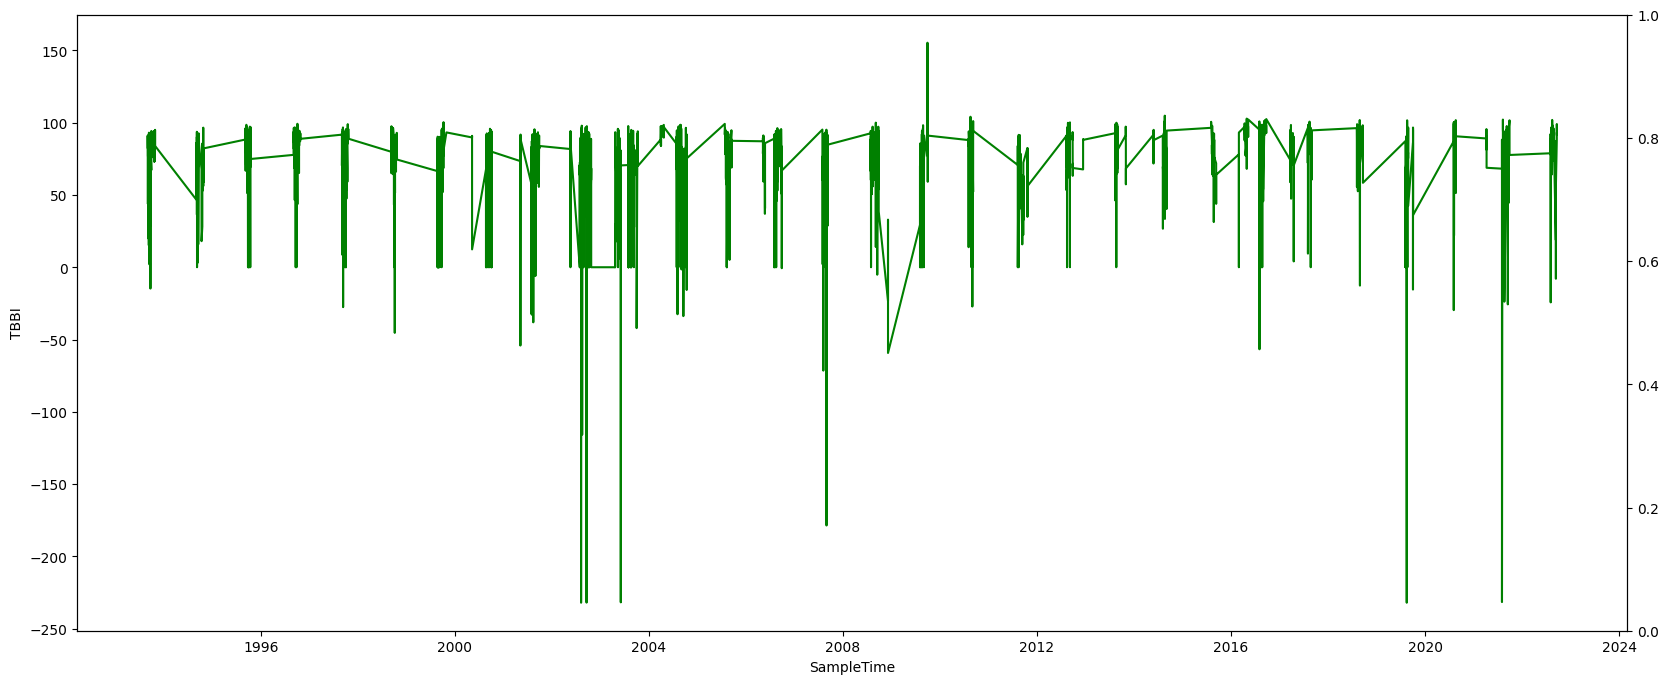

In [39]:
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(y='TBBI',x='SampleTime',data=tbbi_indices,color='green')
ax1=ax.twinx()
sns.lineplot(y='ScoreShannon',x='SampleTime',data=tbbi_indicse)
plt.title('SDI and TBBI Indices over time')

In [45]:
scaler=MinMaxScaler()

In [46]:
tbbi_indices.iloc[:,1:]

,ShannonDiversity,TBBI,AdjCountAbundance
0,0.66,68.84,275.0
1,0.29,57.33,8175.0
2,0.62,66.98,19425.0
3,0.65,15.18,24225.0
4,0.56,63.30,350.0
...,...,...,...
4782,0.56,91.63,7878.0
4783,0.42,92.20,4278.0
4784,0.45,89.32,3977.0
4785,0.56,93.12,6980.0


In [47]:
# No need to split data before scaling this time

In [48]:
tbbi_ind_mmscale=scaler.fit_transform(tbbi_indices.iloc[:,1:])

In [49]:
tbbi_ind_mmscale

array([[8.91891892e-01, 7.76828135e-01, 3.96585936e-04],
       [3.91891892e-01, 7.47108036e-01, 1.17894183e-02],
       [8.37837838e-01, 7.72025408e-01, 2.80133884e-02],
       ...,
       [6.08108108e-01, 8.29709771e-01, 5.73535370e-03],
       [7.56756757e-01, 8.39521793e-01, 1.00660721e-02],
       [8.78378378e-01, 8.27850651e-01, 1.78103138e-02]])

In [50]:
tbbi_mmscale=pd.concat([tbbi_indices.SampleTime,pd.DataFrame(tbbi_ind_mmscale)],axis=1)

In [51]:
tbbi_mmscale.columns=['sampletime','shannon','tbbi','abundance']

In [52]:
tbbi_mmscale.head(2)

,sampletime,shannon,tbbi,abundance
0,1993-09-14 11:33:00,0.891892,0.776828,0.000397
1,1993-09-13 12:37:00,0.391892,0.747108,0.011789


In [53]:
# Scale = 0-1
tbbi_mmscale.describe()

,sampletime,shannon,tbbi,abundance
count,4787,4568.000000,4568.000000,4568.000000
mean,2005-10-03 23:42:39.970754048,0.734448,0.787909,0.015959
min,1993-09-01 08:06:00,0.000000,0.000000,0.000000
25%,2000-09-20 11:05:00,0.702703,0.773484,0.002199
50%,2004-07-28 10:48:00,0.810811,0.805554,0.007481
75%,2009-08-18 12:20:30,0.891892,0.827928,0.017378
max,2022-09-19 11:54:00,1.000000,1.000000,1.000000
std,NaN,0.258301,0.067752,0.034653


In [54]:
# Set 'SampleTime' as the index
tbbi_mmscale = tbbi_mmscale.set_index('sampletime')


In [55]:
# Resample to weekly frequency, starting on Mondays
tbbi_weekly = tbbi_mmscale.resample('W-MON').mean()  # Use appropriate aggregation function (e.g., mean, sum)

# Reset the index if needed
tbbi_weekly = tbbi_weekly.reset_index()
tbbi_weekly.sampletime=pd.to_datetime(tbbi_weekly.sampletime)
print(tbbi_weekly)

     sampletime   shannon      tbbi  abundance
0    1993-09-06  0.805180  0.802363   0.016922
1    1993-09-13  0.787001  0.770197   0.012905
2    1993-09-20  0.819346  0.775457   0.014573
3    1993-09-27  0.756757  0.787720   0.010014
4    1993-10-04  0.783784  0.811454   0.025628
...         ...       ...       ...        ...
1511 2022-08-22  0.669884  0.828778   0.008645
1512 2022-08-29  0.752252  0.824689   0.014250
1513 2022-09-05  0.682432  0.817303   0.015938
1514 2022-09-12  0.840541  0.698038   0.011307
1515 2022-09-19  0.841216  0.837075   0.022607

[1516 rows x 4 columns]


In [56]:
# Benthic Data has been scaled

In [176]:
print(tbbi_weekly.sampletime.min())
tbbi_weekly[tbbi_weekly.sampletime.dt.year==1993].max()


1993-09-06 00:00:00


sampletime    1993-12-27 00:00:00
shannon                  0.819346
tbbi                      0.82512
abundance                0.025628
dtype: object

In [178]:
tbni

,tbni,shannon
date,,
1998-02-02,0.320251,0.374494
1998-02-09,0.320251,0.374494
1998-02-16,0.320251,0.374494
1998-02-23,0.320251,0.374494
1998-03-02,0.528208,0.481854
...,...,...
2021-12-06,0.419568,0.472136
2021-12-13,0.419568,0.472136
2021-12-20,0.419568,0.472136


Text(0.5, 1.0, 'SDI and TBBI Indices over time')

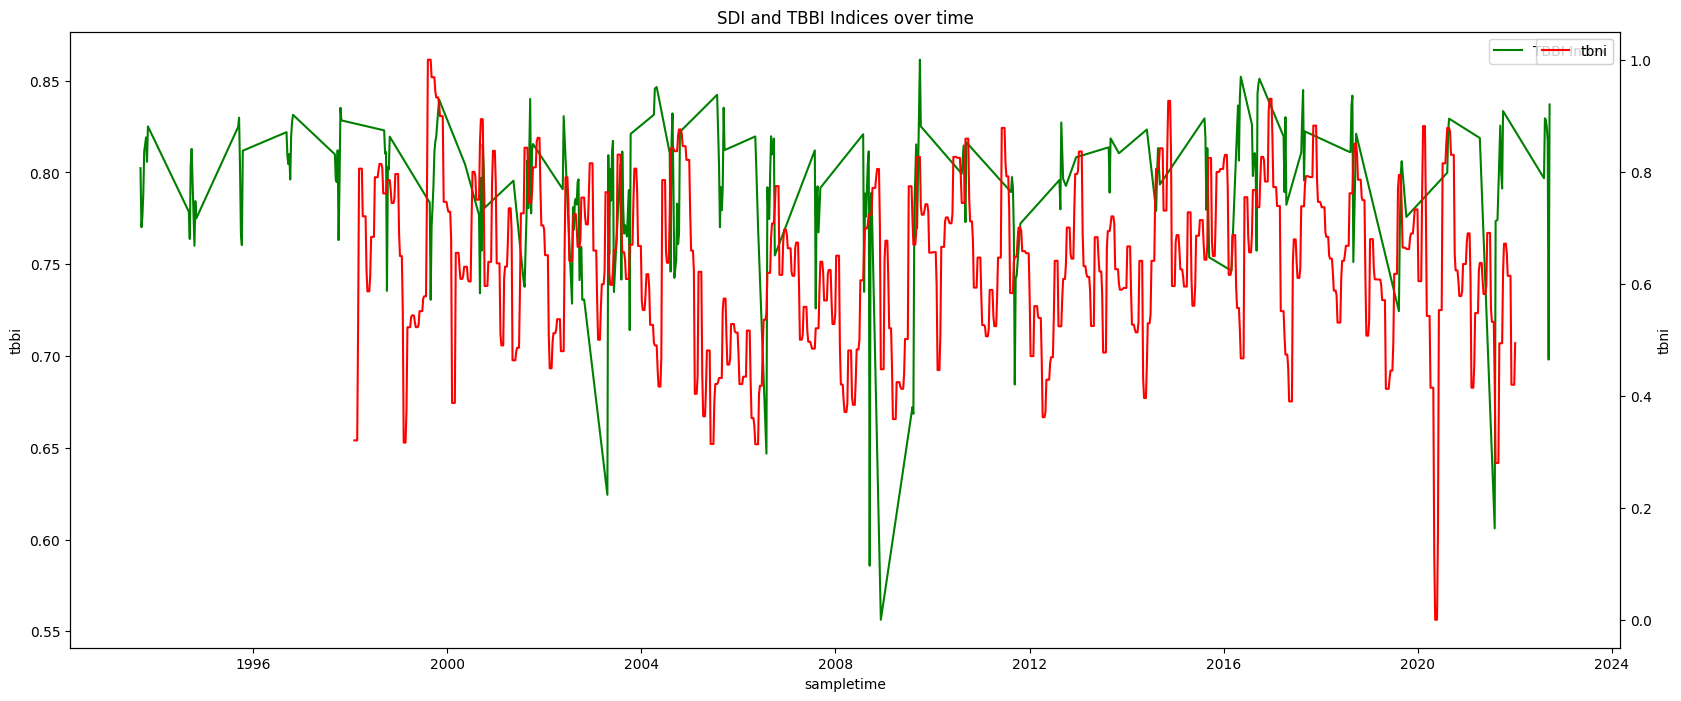

In [180]:
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(y='tbbi',x='sampletime',data=tbbi_weekly,color='green',label='TBBI Index')
ax1=ax.twinx()
sns.lineplot(y='tbni',x=tbni.index,data=tbni,label='tbni',color='red')
#sns.lineplot(y='shannon',x='sampletime',data=tbbi_weekly,label='SDI')
plt.legend()
plt.title('SDI and TBBI Indices over time')

### Pelagic

In [65]:
tbni=nekton_tbni

In [66]:
nekton_tbni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reference                4586 non-null   object 
 1   StartDepth               4586 non-null   float64
 2   BottomVegCover           4559 non-null   float64
 3   BycatchQuantity          4585 non-null   float64
 4   slope                    1198 non-null   float64
 5   ScoreNumTaxa             4586 non-null   int64  
 6   ScoreShannon             4586 non-null   int64  
 7   ScoreTaxaSelect          4586 non-null   int64  
 8   ScoreTaxaBenthic         4586 non-null   int64  
 9   ScoreNumGuilds           4586 non-null   int64  
 10  TBNI_Score               4586 non-null   int64  
 11  acres                    4586 non-null   float64
 12  Non                      4586 non-null   int64  
 13  HA                       4586 non-null   float64
 14  TH                      

In [67]:
tbni=pd.DataFrame(nekton_tbni[['month','year','TBNI_Score','ScoreShannon']])

In [68]:
tbni['date'] = pd.to_datetime(tbni['year'].astype(str) + '-' + tbni['month'].astype(str) + '-01')
#tbni = tbni.set_index('date')

In [70]:
tbni['date'] = pd.to_datetime(tbni['year'].astype(str) + '-' + tbni['month'].astype(str) + '-01')

In [71]:
tbni

,month,year,TBNI_Score,ScoreShannon,date
0,1,1998,18,2,1998-01-01
1,1,1998,14,0,1998-01-01
2,1,1998,0,0,1998-01-01
3,1,1998,20,4,1998-01-01
4,1,1998,46,7,1998-01-01
...,...,...,...,...,...
4581,12,2021,30,4,2021-12-01
4582,12,2021,72,9,2021-12-01
4583,12,2021,42,7,2021-12-01
4584,12,2021,96,10,2021-12-01


In [73]:
tbni=tbni.groupby('date')[['TBNI_Score','ScoreShannon']].mean()

In [74]:
tbni

,TBNI_Score,ScoreShannon
date,,
1998-01-01,20.923077,2.846154
1998-02-01,52.625000,4.750000
1998-03-01,47.066667,4.666667
1998-04-01,38.307692,4.538462
1998-05-01,44.666667,5.200000
...,...,...
2021-08-01,32.250000,3.750000
2021-09-01,43.875000,5.687500
2021-10-01,40.125000,5.437500


In [75]:
# Aggregate to monthly frequency (since you only have year and month)
tbni_monthly = tbni.resample('M').sum()

# Resample to daily frequency and forward-fill monthly values
tbni_daily = tbni_monthly.resample('D').ffill()

# Resample to weekly frequency
tbni_weekly = tbni_daily.resample('W-MON').mean()

# Reset index if needed
tbni_weekly = tbni_weekly.reset_index()

C:\Users\Ajax\AppData\Local\Temp\ipykernel_23488\2482966111.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tbni_monthly = tbni.resample('M').sum()


In [76]:
tbni_weekly

,date,TBNI_Score,ScoreShannon
0,1998-02-02,20.923077,2.846154
1,1998-02-09,20.923077,2.846154
2,1998-02-16,20.923077,2.846154
3,1998-02-23,20.923077,2.846154
4,1998-03-02,34.509615,3.662088
...,...,...,...
1244,2021-12-06,27.411765,3.588235
1245,2021-12-13,27.411765,3.588235
1246,2021-12-20,27.411765,3.588235
1247,2021-12-27,27.411765,3.588235


Text(0.5, 1.0, 'SDI and TBNI Indices over time')

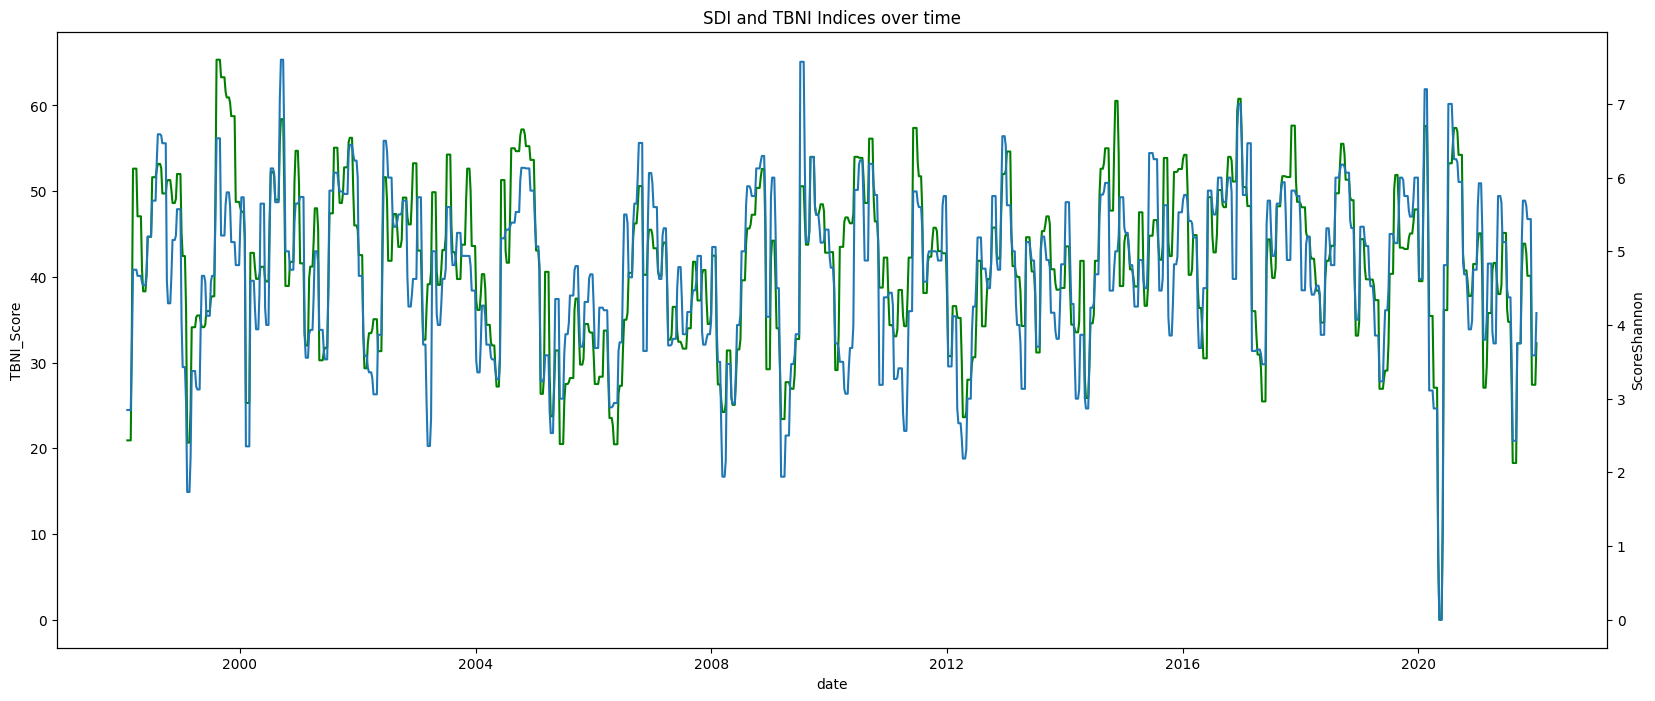

In [77]:
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(y='TBNI_Score',x='date',data=tbni_weekly,color='green')
ax1=ax.twinx()
sns.lineplot(y='ScoreShannon',x='date',data=tbni_weekly)
plt.title('SDI and TBNI Indices over time')

<Axes: xlabel='ScoreShannon', ylabel='TBNI_Score'>

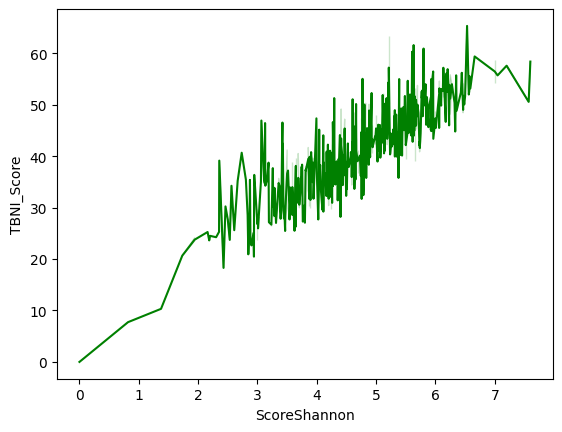

In [78]:
sns.lineplot(y='TBNI_Score',x='ScoreShannon',data=tbni_weekly,color='green')

In [79]:
tbni_weekly

,date,TBNI_Score,ScoreShannon
0,1998-02-02,20.923077,2.846154
1,1998-02-09,20.923077,2.846154
2,1998-02-16,20.923077,2.846154
3,1998-02-23,20.923077,2.846154
4,1998-03-02,34.509615,3.662088
...,...,...,...
1244,2021-12-06,27.411765,3.588235
1245,2021-12-13,27.411765,3.588235
1246,2021-12-20,27.411765,3.588235
1247,2021-12-27,27.411765,3.588235


In [83]:
# Scaling now
scaler=MinMaxScaler()

In [84]:
tbni_scale=scaler.fit_transform(tbni_weekly.iloc[:,1:])

In [85]:
tbni_mmscale=pd.concat([tbni_weekly.date,pd.DataFrame(tbni_scale)],axis=1)

In [86]:
tbni_mmscale.index=tbni_mmscale.date
tbni_mmscale=tbni_mmscale.drop(columns='date')

In [151]:
tbni_mmscale.columns=['tbni','shannon']
tbni=tbni_mmscale

### Organic Nitrogen

In [171]:
org_n=ncompounds[['date','ResultValue_O']]

In [172]:
org_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1803 non-null   object 
 1   ResultValue_O  1803 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.3+ KB


In [173]:
org_n.head()

,date,ResultValue_O
0,1990-01-07,0.550000
1,1990-01-14,0.666842
2,1990-01-21,0.336667
3,1990-01-28,0.803333
4,1990-02-04,1.270000


In [130]:
scaler=MinMaxScaler()
scaled=scaler.fit_transform(org_n.ResultValue_O.to_frame())
org_n['resultvalue_O_scaled']=scaled

C:\Users\Ajax\AppData\Local\Temp\ipykernel_23488\980883472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org_n['resultvalue_O_scaled']=scaled


In [210]:
org_n

,date,ResultValue_O
0,1990-01-07,0.550000
1,1990-01-14,0.666842
2,1990-01-21,0.336667
3,1990-01-28,0.803333
4,1990-02-04,1.270000
...,...,...
1798,2024-06-23,0.070519
1799,2024-06-30,0.061037
1800,2024-07-07,0.051556
1801,2024-07-14,0.071571


In [131]:
# Organic nitrogen is scaled

Nekton has beens scaled

## Anthropogenic Factors

Description: All features need to be scaled using a MinMaxScaler.
As before, inorganic compounds will be included in the API as an anthropogenic factor.

While ADF describes each individual compound as exhibiting stationairity, there is a complex underlying relationship that isn't effectively captured and will require more analysis.
VAR has described organic nitrogen as related at certain possible lag values.
The data for this initial proof of concept has been aggregated at a high level - and in particular geospatially.
Nitrate and ammonia input can be highly localized due to where they are introduced into the bay, oceanographic processes & human interactions that extend beyond the scope of this study.

Nitrogen is described as one of the biggest drivers of damage to the local ecosystem. In order to attempt to capture any relationship between nitrates/ammonia, organic nitrogen and the impact on, or correlation with, other ecosystem indicators will be important.
Organics will be assessed as its own feature when being fed into the neural net when attempting to assess the API index.



### Nitrogen

In [88]:
# "VAR DATA" are just the cleaned data for each individual compound in mg/L.
ncompounds=VAR_data

In [89]:
ncompounds

,date,ResultValue_K,ResultValue_A,ResultValue_N,ResultValue_O
0,1990-01-07,0.583333,0.033333,0.006500,0.550000
1,1990-01-14,0.723684,0.056842,0.022826,0.666842
2,1990-01-21,0.408333,0.071667,0.006500,0.336667
3,1990-01-28,0.859167,0.055833,0.038250,0.803333
4,1990-02-04,1.310000,0.040000,0.070000,1.270000
...,...,...,...,...,...
1798,2024-06-23,0.136519,0.066000,0.031852,0.070519
1799,2024-06-30,0.139037,0.078000,0.039704,0.061037
1800,2024-07-07,0.141556,0.090000,0.047556,0.051556
1801,2024-07-14,0.134571,0.063000,0.035286,0.071571


In [90]:
org_n=ncompounds[['date','ResultValue_O']]
inorg_n=ncompounds[['date','ResultValue_K','ResultValue_A','ResultValue_N']]

In [91]:
org_n

,date,ResultValue_O
0,1990-01-07,0.550000
1,1990-01-14,0.666842
2,1990-01-21,0.336667
3,1990-01-28,0.803333
4,1990-02-04,1.270000
...,...,...
1798,2024-06-23,0.070519
1799,2024-06-30,0.061037
1800,2024-07-07,0.051556
1801,2024-07-14,0.071571


In [92]:
inorg_n

,date,ResultValue_K,ResultValue_A,ResultValue_N
0,1990-01-07,0.583333,0.033333,0.006500
1,1990-01-14,0.723684,0.056842,0.022826
2,1990-01-21,0.408333,0.071667,0.006500
3,1990-01-28,0.859167,0.055833,0.038250
4,1990-02-04,1.310000,0.040000,0.070000
...,...,...,...,...
1798,2024-06-23,0.136519,0.066000,0.031852
1799,2024-06-30,0.139037,0.078000,0.039704
1800,2024-07-07,0.141556,0.090000,0.047556
1801,2024-07-14,0.134571,0.063000,0.035286


This isn't creating a model yet, so data isn't yet going to be split into test or train data.

In [93]:
# Setting date as the index
#inorg_n.reset_index(inplace=True)
#inorg_n.index=inorg_n.date

In [94]:
#inorg_n=inorg_n.drop(columns='date')

In [95]:
# Scaling using minmaxscaler
scaler=MinMaxScaler()
fitscale=scaler.fit(inorg_n.iloc[:,1:])
inorg_n_mmscale=fitscale.transform(inorg_n.iloc[:,1:])

In [96]:
inorg_nit=pd.concat([inorg_n.date,pd.DataFrame(inorg_n_mmscale)],axis=1)

In [97]:
inorg_nit.columns=['date','kjeldahl','ammonia','nitrate']
inorg_nit

,date,kjeldahl,ammonia,nitrate
0,1990-01-07,0.176207,0.031631,0.013970
1,1990-01-14,0.223463,0.054511,0.051982
2,1990-01-21,0.117284,0.068939,0.013970
3,1990-01-28,0.269080,0.053529,0.087893
4,1990-02-04,0.420875,0.038119,0.161816
...,...,...,...,...
1798,2024-06-23,0.025764,0.063424,0.072996
1799,2024-06-30,0.026612,0.075103,0.091278
1800,2024-07-07,0.027460,0.086782,0.109559
1801,2024-07-14,0.025108,0.060504,0.080991


In [98]:
# nitrogen scaled. Will drop kjeldahl later.

### Development

In [99]:
# dev
# change

In [100]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     36 non-null     int64  
 1   year           36 non-null     int64  
 2   num_homes      36 non-null     float64
 3   num_buildings  36 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.3 KB


In [101]:
dev.drop(columns=dev.columns[0],inplace=True)

In [102]:
dev

,year,num_homes,num_buildings
0,1989,5291.0,5705
1,1990,4260.0,4590
2,1991,3558.0,4849
3,1992,4147.0,4795
4,1993,4992.0,5264
5,1994,5176.0,5298
6,1995,5105.0,5771
7,1996,5346.0,6094
8,1997,5440.0,5754
9,1998,6318.0,7619


In [103]:
change.drop(columns=change.columns[0],inplace=True)

In [104]:
change['buildings_over_homes']=change.build_new/change.built_new

In [105]:
change.index=change.year

In [106]:
change.head()

,perchange_homesbuilt,built_base_year,built_new,year,perchange_buildings,build_base,build_new,buildings_over_homes
year,,,,,,,,
1990,80.514,5291.0,4260.0,1990,80.456,5705,4590,1.077465
1991,83.521,4260.0,3558.0,1991,105.643,4590,4849,1.362844
1992,116.554,3558.0,4147.0,1992,98.886,4849,4795,1.156258
1993,120.376,4147.0,4992.0,1993,109.781,4795,5264,1.054487
1994,103.686,4992.0,5176.0,1994,100.646,5264,5298,1.023570


In [181]:
dev['date'] = pd.to_datetime(dev['year'].astype(str) + '-01-01')
dev = dev.set_index('date')

# Resample to daily frequency and forward-fill the population values
dev_df_daily = dev.resample('D').ffill()

# Resample to weekly frequency, starting on Mondays
dev_df_weekly = dev_df_daily.resample('W-MON').mean()

# Reset the index if needed
dev_df_weekly = dev_df_weekly.reset_index()

In [182]:
dev_df_weekly

,date,year,num_homes,num_buildings
0,1989-01-02,1989.000000,5291.000000,5705.000000
1,1989-01-09,1989.000000,5291.000000,5705.000000
2,1989-01-16,1989.000000,5291.000000,5705.000000
3,1989-01-23,1989.000000,5291.000000,5705.000000
4,1989-01-30,1989.000000,5291.000000,5705.000000
...,...,...,...,...
1822,2023-12-04,2023.000000,5702.000000,6872.000000
1823,2023-12-11,2023.000000,5702.000000,6872.000000
1824,2023-12-18,2023.000000,5702.000000,6872.000000
1825,2023-12-25,2023.000000,5702.000000,6872.000000


In [107]:
#org_n.date=pd.to_datetime(org_n.date)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_23488\3298052949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org_n.date=pd.to_datetime(org_n.date)


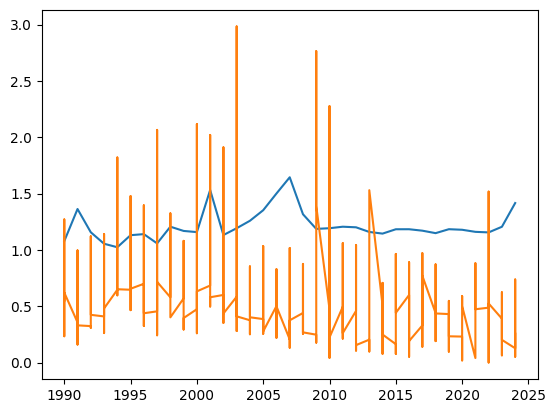

In [108]:

#plt.plot(change.buildings_over_homes)
#plt.plot(org_n.date.dt.year,org_n.ResultValue_O)

In [197]:
#dev_df_weekly.drop(columns='year',inplace=True)
dev_df_weekly

,date,num_homes,num_buildings
0,1989-01-02,5291.000000,5705.000000
1,1989-01-09,5291.000000,5705.000000
2,1989-01-16,5291.000000,5705.000000
3,1989-01-23,5291.000000,5705.000000
4,1989-01-30,5291.000000,5705.000000
...,...,...,...
1822,2023-12-04,5702.000000,6872.000000
1823,2023-12-11,5702.000000,6872.000000
1824,2023-12-18,5702.000000,6872.000000
1825,2023-12-25,5702.000000,6872.000000


In [199]:
#scaled data
scaler=MinMaxScaler()
scaled=scaler.fit_transform(dev_df_weekly.iloc[:,1:])
dev_scaled=pd.concat([dev_df_weekly.date,pd.DataFrame(scaled)],axis=1)
dev_scaled.columns=['date','num_homes','num_buildings']

### Population

In [110]:
# Neesd to be scaled

In [111]:
pop.head(3)

,Unnamed: 0,year,WHO_pred,metro_est_pop,metro_known
0,0,1969,942073.589560,446894.001549,483694.0
1,1,1970,968021.607863,466072.849336,493409.0
2,2,1971,993969.626166,485251.697122,513136.0


In [112]:
pop.drop(columns=pop.columns[0],inplace=True)

In [113]:
pop.WHO_pred

0     9.420736e+05
1     9.680216e+05
2     9.939696e+05
3     1.019918e+06
4     1.045866e+06
5     1.071814e+06
6     1.097762e+06
7     1.123710e+06
8     1.149658e+06
9     1.175606e+06
10    1.201554e+06
11    1.227502e+06
12    1.253450e+06
13    1.279398e+06
14    1.305346e+06
15    1.331294e+06
16    1.357242e+06
17    1.383190e+06
18    1.409138e+06
19    1.435086e+06
20    1.461034e+06
21    1.486982e+06
22    1.512930e+06
23    1.538878e+06
24    1.564826e+06
25    1.590774e+06
26    1.616722e+06
27    1.642670e+06
28    1.668618e+06
29    1.694566e+06
30    1.720514e+06
31    1.746462e+06
32    1.772410e+06
33    1.798358e+06
34    1.824306e+06
35    1.850254e+06
36    1.876202e+06
37    1.902150e+06
38    1.928098e+06
39    1.954046e+06
40    1.979994e+06
41    2.005942e+06
42    2.031890e+06
43    2.057838e+06
44    2.083786e+06
45    2.109734e+06
46    2.135682e+06
47    2.161630e+06
48    2.187578e+06
49    2.213526e+06
50    2.239475e+06
51    2.265423e+06
52    2.2913

In [ ]:
pop

<Axes: >

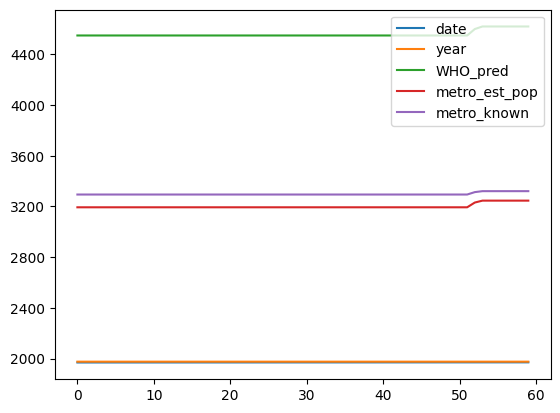

In [168]:
pop['date'] = pd.to_datetime(pop['year'].astype(str) + '-01-01')
pop = pop.set_index('date')

# Resample to daily frequency and forward-fill the population values
pop_df_daily = pop.resample('D').ffill()

# Resample to weekly frequency, starting on Mondays
pop_df_weekly = pop_df_daily.resample('W-MON').mean()

# Reset the index if needed
pop_df_weekly = pop_df_weekly.reset_index()

In [207]:
pop_df_weekly.drop(columns='year',inplace=True)

In [208]:
#scaled data
scaler2=MinMaxScaler()
scaled=scaler2.fit_transform(pop_df_weekly.iloc[:,1:])
pop_scaled=pd.concat([pop_df_weekly.date,pd.DataFrame(scaled)],axis=1)
pop_scaled.columns=['year','WHO_predicted','metro_est_pop','metro_known']

In [209]:
pop_scaled

,year,WHO_predicted,metro_est_pop,metro_known
0,1969-01-06,0.000000,0.000000,0.0
1,1969-01-13,0.000000,0.000000,0.0
2,1969-01-20,0.000000,0.000000,0.0
3,1969-01-27,0.000000,0.000000,0.0
4,1969-02-03,0.000000,0.000000,0.0
...,...,...,...,...
2865,2023-12-04,0.997361,0.997361,NaN
2866,2023-12-11,0.997361,0.997361,NaN
2867,2023-12-18,0.997361,0.997361,NaN
2868,2023-12-25,0.997361,0.997361,NaN


In [170]:
## Scaled

## API INDEX

In [132]:
# Anth. tables:
# Inorg. Nitrogen (inorg_nit)
# Dev.
# Population


#tbni (tbni, shannon)
#tbbi_weekly (tbbi,shannon)
#Org Nitrogen ()


In [201]:
inorg_nit.head(2)

,date,kjeldahl,ammonia,nitrate
0,1990-01-07,0.176207,0.031631,0.013970
1,1990-01-14,0.223463,0.054511,0.051982


In [202]:
dev_scaled.head(1)

,date,num_homes,num_buildings
0,1989-01-02,0.400761,0.280188


In [211]:
pop_scaled.head(2)

,year,WHO_predicted,metro_est_pop,metro_known
0,1969-01-06,0.0,0.0,0.0
1,1969-01-13,0.0,0.0,0.0


In [214]:
#pop_scaled.drop(columns=pop_scaled.iloc[:,2:4],inplace=True)

In [213]:
pop_scaled

,year,WHO_predicted
0,1969-01-06,0.000000
1,1969-01-13,0.000000
2,1969-01-20,0.000000
3,1969-01-27,0.000000
4,1969-02-03,0.000000
...,...,...
2865,2023-12-04,0.997361
2866,2023-12-11,0.997361
2867,2023-12-18,0.997361
2868,2023-12-25,0.997361


In [156]:
# Data was scaled at the end of each section
"""
feature1_scaled = scaler.fit_transform(feature1.values.reshape(-1, 1))
feature2_scaled = scaler.fit_transform(feature2.values.reshape(-1, 1))
feature3_scaled = scaler.fit_transform(feature3.values.reshape(-1, 1))
"""

'\nfeature1_scaled = scaler.fit_transform(feature1.values.reshape(-1, 1))\nfeature2_scaled = scaler.fit_transform(feature2.values.reshape(-1, 1))\nfeature3_scaled = scaler.fit_transform(feature3.values.reshape(-1, 1))\n'

In [217]:
tbni

,tbni,shannon
date,,
1998-02-02,0.320251,0.374494
1998-02-09,0.320251,0.374494
1998-02-16,0.320251,0.374494
1998-02-23,0.320251,0.374494
1998-03-02,0.528208,0.481854
...,...,...
2021-12-06,0.419568,0.472136
2021-12-13,0.419568,0.472136
2021-12-20,0.419568,0.472136


In [218]:
tbbi_weekly

,sampletime,shannon,tbbi,abundance
0,1993-09-06,0.805180,0.802363,0.016922
1,1993-09-13,0.787001,0.770197,0.012905
2,1993-09-20,0.819346,0.775457,0.014573
3,1993-09-27,0.756757,0.787720,0.010014
4,1993-10-04,0.783784,0.811454,0.025628
...,...,...,...,...
1511,2022-08-22,0.669884,0.828778,0.008645
1512,2022-08-29,0.752252,0.824689,0.014250
1513,2022-09-05,0.682432,0.817303,0.015938
1514,2022-09-12,0.840541,0.698038,0.011307


In [ ]:
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(df[['development_data', 'population', 'nitrate_concentration']])

# Fit the model
model = LinearRegression()
model.fit(X_poly, df['TBBI'])  # Replace 'TBBI' with other indices

# Make predictions
y_pred = model.predict(X_poly)

# Evaluate the model
r2 = r2_score(df['TBBI'], y_pred)
print("R-squared:", r2)

In [ ]:


# Define weights (adjust as needed)
weights = {
    'feature1': 0.4,
    'feature2': 0.3,
    'feature3': 0.3,
}

# Normalize weights
total_weight = sum(weights.values())
normalized_weights = {key: value / total_weight for key, value in weights.items()}

# Calculate weighted means
weighted_mean1 = np.mean(feature1_scaled * normalized_weights['feature1'])
weighted_mean2 = np.mean(feature2_scaled * normalized_weights['feature2'])
weighted_mean3 = np.mean(feature3_scaled * normalized_weights['feature3'])

# Calculate the mean sum weight index
mean_sum_index = weighted_mean1 + weighted_mean2 + weighted_mean3

print("Mean Sum Weight Index:", mean_sum_index)

,TBNI_Score,ScoreShannon
date,,
1998-01-01,20.923077,2.846154
1998-02-01,52.625000,4.750000
1998-03-01,47.066667,4.666667
1998-04-01,38.307692,4.538462
1998-05-01,44.666667,5.200000
...,...,...
2021-08-01,32.250000,3.750000
2021-09-01,43.875000,5.687500
2021-10-01,40.125000,5.437500


## LSTM_Rebuilt

In [ ]:
# ... (your code to load and prepare the data) ...

# Scale the anthropogenic components
scaler = MinMaxScaler()
df[['development_scaled', 'population_scaled', 'nitrate_scaled']] = scaler.fit_transform(
    df[['development', 'population', 'nitrate']]
)

# Assign weights (adjust as needed)
weights = {'development': 0.4, 'population': 0.3, 'nitrate': 0.3}
total_weight = sum(weights.values())
normalized_weights = {key: value / total_weight for key, value in weights.items()}

# Calculate the anthropogenic index
df['anthropogenic_index'] = (
    df['development_scaled'] * normalized_weights['development'] +
    df['population_scaled'] * normalized_weights['population'] +
    df['nitrate_scaled'] * normalized_weights['nitrate']
)

In [ ]:
# Create the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3))  # Output layer for 3 ecological indices

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(df['anthropogenic_index'], df[['TBBI', 'TBNI', 'Shannon Diversity']], epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(df['anthropogenic_index'])

In [73]:
NP_nn.reset_index(names='Date',inplace=True)

In [74]:
NP_nn.Date=NP_nn.Date.astype('int64')

In [82]:
NP_nn

,Date,Reference,StartDepth,BottomVegCover,BycatchQuantity,slope,ScoreNumTaxa,ScoreShannon,ScoreTaxaSelect,ScoreTaxaBenthic,...,FLUCCSCODE,areas,bottom,DominantVeg,bveg,Shore,bay_TBEPseg_season,bay_TBEPseg_sgyr,bay_TBEPseg_sgyr_season,BvegCovBin
0,0,TBM1998010906,0.6,0.0,0.0,0.0,2,2,0,0,...,NaN,22.0,MudSan,NaN,Non,ManTer,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
1,1,TBM1998010910,0.8,0.0,0.0,0.0,1,0,3,1,...,NaN,21.0,MudSan,NaN,Non,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
2,2,TBM1998010912,0.7,0.0,0.0,0.0,0,0,0,0,...,NaN,21.0,MudSan,NaN,Non,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
3,3,TBM1998010914,0.9,10.0,0.0,0.0,2,4,0,2,...,NaN,21.0,MudSan,Halodule spp.,SAV,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter,0-25
4,4,TBM1998010915,0.5,0.0,0.0,0.0,4,7,3,4,...,9113.0,27.0,San,NaN,Non,Man,MTB_Winter,MTB_1999,MTB_1999 _Winter,0-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,4581,TBM2021120704,1.0,0.0,0.1,NaN,3,4,0,3,...,NaN,8.0,MudSan,NaN,Non,Man,LTB_Winter,LTB_2022,LTB_2022 _Winter,0-25
4582,4582,TBM2021120705,0.5,80.0,0.0,NaN,10,9,0,9,...,9116.0,8.0,Mud,Halodule spp.,SAV,Man,LTB_Winter,LTB_2022,LTB_2022 _Winter,76-100
4583,4583,TBM2021120802,0.3,20.0,0.0,NaN,3,7,0,3,...,9116.0,16.0,SanStr,Thalassia spp.,SAV,Non,LTB_Winter,LTB_2022,LTB_2022 _Winter,0-25
4584,4584,TBM2021120804,0.6,100.0,3.0,NaN,10,10,10,10,...,9116.0,18.0,SanStr,Syringodium spp.,SAV,Str,MTB_Winter,MTB_2022,MTB_2022 _Winter,76-100


In [83]:
# SDI = SHANNON DIVERSITY INDEX
# Get base info for SDI joining to separate anthor
print(f'head: {ScoreShannon[:10]} \n LENGTH OF SDI {len(shannon)}')

NameError: name 'ScoreShannon' is not defined

In [77]:
NP_nn.iloc[:,:-1]

,Date,Reference,StartDepth,BottomVegCover,BycatchQuantity,slope,ScoreNumTaxa,ScoreShannon,ScoreTaxaSelect,ScoreTaxaBenthic,...,sgyear,FLUCCSCODE,areas,bottom,DominantVeg,bveg,Shore,bay_TBEPseg_season,bay_TBEPseg_sgyr,bay_TBEPseg_sgyr_season
0,0,TBM1998010906,0.6,0.0,0.0,0.0,2,2,0,0,...,1999.0,NaN,22.0,MudSan,NaN,Non,ManTer,OTB_Winter,OTB_1999,OTB_1999 _Winter
1,1,TBM1998010910,0.8,0.0,0.0,0.0,1,0,3,1,...,1999.0,NaN,21.0,MudSan,NaN,Non,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter
2,2,TBM1998010912,0.7,0.0,0.0,0.0,0,0,0,0,...,1999.0,NaN,21.0,MudSan,NaN,Non,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter
3,3,TBM1998010914,0.9,10.0,0.0,0.0,2,4,0,2,...,1999.0,NaN,21.0,MudSan,Halodule spp.,SAV,Man,OTB_Winter,OTB_1999,OTB_1999 _Winter
4,4,TBM1998010915,0.5,0.0,0.0,0.0,4,7,3,4,...,1999.0,9113.0,27.0,San,NaN,Non,Man,MTB_Winter,MTB_1999,MTB_1999 _Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,4581,TBM2021120704,1.0,0.0,0.1,NaN,3,4,0,3,...,2022.0,NaN,8.0,MudSan,NaN,Non,Man,LTB_Winter,LTB_2022,LTB_2022 _Winter
4582,4582,TBM2021120705,0.5,80.0,0.0,NaN,10,9,0,9,...,2022.0,9116.0,8.0,Mud,Halodule spp.,SAV,Man,LTB_Winter,LTB_2022,LTB_2022 _Winter
4583,4583,TBM2021120802,0.3,20.0,0.0,NaN,3,7,0,3,...,2022.0,9116.0,16.0,SanStr,Thalassia spp.,SAV,Non,LTB_Winter,LTB_2022,LTB_2022 _Winter
4584,4584,TBM2021120804,0.6,100.0,3.0,NaN,10,10,10,10,...,2022.0,9116.0,18.0,SanStr,Syringodium spp.,SAV,Str,MTB_Winter,MTB_2022,MTB_2022 _Winter


In [78]:
model=Sequential()

In [79]:
freq_nn.iloc[:,:-1].values()

NameError: name 'freq_nn' is not defined

In [80]:
# Split the data into features (X) and target variable (y)
X = NP_nn.iloc[:, :-1].values  # Select all columns except the last one
y = NP_nn.iloc[:, -1].values  # Select the last column as the target

In [81]:
# Split the data into features (X) and target variable (y)
X = freq_nn.iloc[:, :-1].values  # Select all columns except the last one
y = freq_nn.iloc[:, -1].values  # Select the last column as the target

# Normalize data 

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)) 

# Reshape the data for LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Create the LSTM model
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))  # First LSTM layer
model.add(LSTM(64))  # Second LSTM layer
model.add(Dense(1))  # Output layer with 1 neuron for your target

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model

NameError: name 'freq_nn' is not defined

In [ ]:
TBNI=nekton_tbni_nn.TBNI_Score

In [ ]:
nekton_tbni_nn2.drop(columns='slope',inplace=True)

In [ ]:
nekton_tbni_nn2['TBNI']=TBNI

In [ ]:
nekton_tbni_nn2.isna().sum()

StartDepth             0
BottomVegCover        27
BycatchQuantity        1
slope               3388
ScoreNumTaxa           0
ScoreShannon           0
ScoreTaxaSelect        0
ScoreTaxaBenthic       0
ScoreNumGuilds         0
acres                  0
Non                    0
HA                     0
TH                     0
SAV                    0
Alg                    0
RU                     0
temperature            1
salinity               6
dissolvedO2           69
month                  0
year                   0
gr                     0
sgyear                11
areas                 11
TBNI                   0
dtype: int64

In [ ]:
nekton_tbni_nn.iloc[:, -1]

0       18
1       14
2        0
3       20
4       46
        ..
4581    30
4582    72
4583    42
4584    96
4585    34
Name: TBNI, Length: 4586, dtype: int64

In [ ]:
nekton_tbni_nn2.drop(columns=nekton_tbni_nn2.columns[[19,24]],inplace=True)

In [ ]:
nekton_tbni_nn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StartDepth        4586 non-null   float64
 1   BottomVegCover    4559 non-null   float64
 2   BycatchQuantity   4585 non-null   float64
 3   slope             1198 non-null   float64
 4   ScoreNumTaxa      4586 non-null   int64  
 5   ScoreShannon      4586 non-null   int64  
 6   ScoreTaxaSelect   4586 non-null   int64  
 7   ScoreTaxaBenthic  4586 non-null   int64  
 8   ScoreNumGuilds    4586 non-null   int64  
 9   acres             4586 non-null   float64
 10  Non               4586 non-null   int64  
 11  HA                4586 non-null   float64
 12  TH                4586 non-null   float64
 13  SAV               4586 non-null   float64
 14  Alg               4586 non-null   float64
 15  RU                4586 non-null   float64
 16  temperature       4585 non-null   float64


In [70]:
nekton_tbni_nn2=nekton_tbni.drop(columns=nekton_tbni.columns[[0,25,26,30,31,32,33,34,35,36,37]])

In [71]:
NP_nn

NameError: name 'NP_nn' is not defined

In [ ]:
# Establish dataset to be used for processing in NN
# Table must be formatted with y as last column

# This could be done with multiple tables in a loop -> 

In [ ]:
# Perform Test Train Split For Whatever Data will be passed through NN

In [84]:
# Separate features (X) and target (y)
X = nekton_tbni_nn2.iloc[:, :-1].values  # Selects all columns except the last one
y = nekton_tbni_nn2.iloc[:, -1].values   # Selects the last column as the target

# Normalize data 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)) 

# Reshape for LSTM (samples, timesteps, features)
# Assuming each row represents a single timestep
X = X.reshape(X.shape[0], 1, X.shape[1]) 

# Create the model
model = Sequential()
model.add(LSTM(8, input_shape=(X.shape[1], X.shape[2]),activation='relu', return_sequences=True))
#model.add(LSTM(128, return_sequences=True))  # Added another LSTM layer 
#model.add(LSTM(8, 
#               input_shape=(X.shape[1], X.shape[2]), 
#               return_sequences=True, 
#               activation='relu'))
model.add(LSTM(3,activation='relu'))  # Keep this layer
model.add(Dense(1))
# Another LSTM layer with fewer neurons

# Compile the model
model.compile(loss='mse', optimizer='adam',metrics=['accuracy']) 

# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X, y) 
print('Loss:', loss)
model.summary()

Epoch 1/100


C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0365 - loss: nan - val_accuracy: 0.0359 - val_loss: nan
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.0312 - loss: nan - val_accuracy: 0.0359 - val_loss: nan
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.0315 - loss: nan - val_accuracy: 0.0359 - val_loss: nan
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.0298 - loss: nan - val_accuracy: 0.0359 - val_loss: nan
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.0312 - loss: nan - val_accuracy: 0.0359 - val_loss: nan
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.0369 - loss: nan - val_accuracy: 0.0359 - val_loss: nan
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.0351 - loss: nan - val_accuracy: 0.0359 - val_loss: nan
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.0352 - loss: nan - val_accuracy: 0.0359 - val_loss: nan
Epoch 9/100
11

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 8)                │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 3)                   │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,806 (14.87 KB)

 Trainable params: 1,268 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,538 (9.92 KB)

In [85]:
test=model.fit(X,y,epochs=100,batch_size=10,validation_split=0.15)
loss=model.evaluate(X,y)
print('Loss: ',loss)

Epoch 1/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.0266 - loss: nan - val_accuracy: 0.0320 - val_loss: nan
Epoch 2/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.0317 - loss: nan - val_accuracy: 0.0320 - val_loss: nan
Epoch 3/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.0303 - loss: nan - val_accuracy: 0.0320 - val_loss: nan
Epoch 4/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.0337 - loss: nan - val_accuracy: 0.0320 - val_loss: nan
Epoch 5/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.0356 - loss: nan - val_accuracy: 0.0320 - val_loss: nan
Epoch 6/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.0364 - loss: nan - val_accuracy: 0.0320 - val_loss: nan
Epoch 7/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.0344 - loss: nan - val_accuracy: 0.0320 - val_loss: nan
Epoch 8/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.0309 - loss: nan - val_accuracy: 0.0320 - val_loss: nan


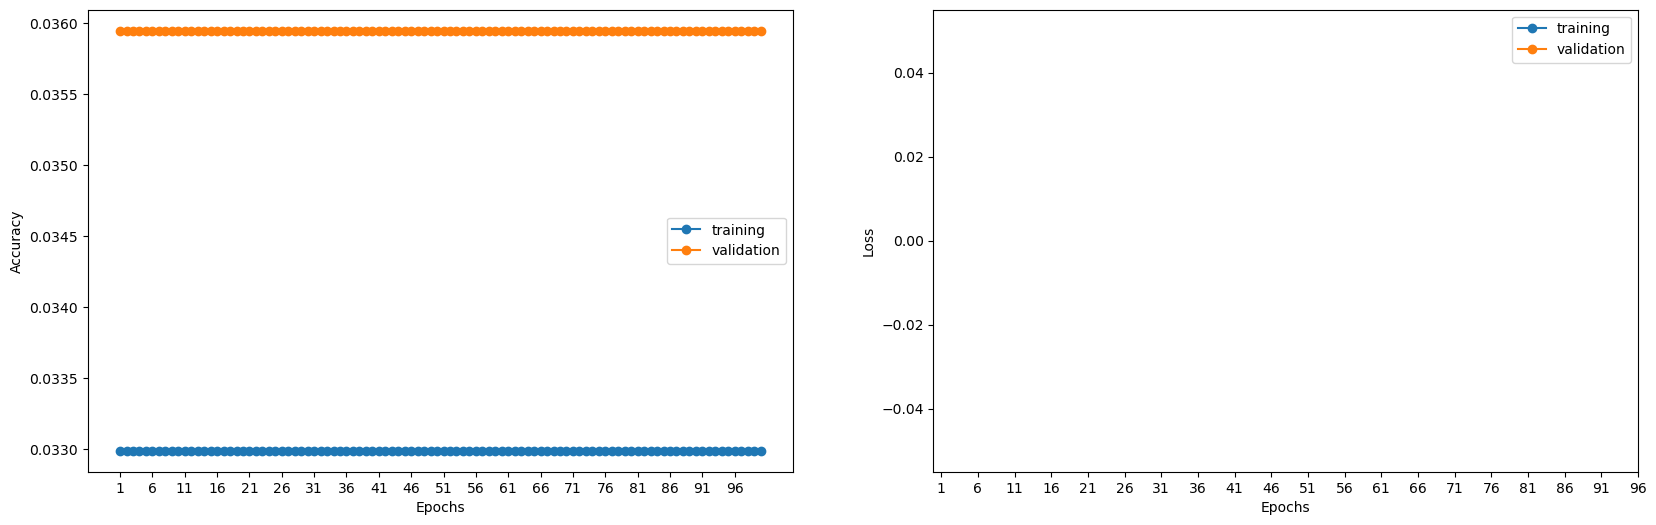

In [86]:
epochs = range(1, 101)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["accuracy"], label="training", marker="o")
plt.plot(epochs, history.history["val_accuracy"], label="validation", marker="o")
plt.xlabel("Epochs")
plt.xticks(epochs[::5])
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, history.history["loss"], label="training", marker="o")
plt.plot(epochs, history.history["val_loss"], label="validation", marker="o")
plt.xlabel("Epochs")
plt.xticks(epochs[::5])
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
freq.head(5)

,Aca_quadricornis,Ach_lineatus,Achiridae_spp,Adi_xenica,Aet_narinari,Albula_spp,Alu_schoepfii,Ana_criniger,Anc_cubana,Anc_hepsetus,Anc_lyolepis,Anc_mitchilli,Anchoa_spp,Arc_probatocephalus,Argopecten_spp,Ari_felis,Ast_y_graecum,Bag_marinus,Bai_chrysoura,Bat_soporator,Bathygobius_spp,Brevoortia_spp,Cal_arctifrons,Cal_ornatus,Cal_penna,Cal_sapidus,Cal_similis,Calamus_spp,Callinectes_spp,Car_hippos,Car_leucas,Car_limbatus,Cen_striata,Cen_undecimalis,Cha_faber,Cha_saburrae,Chi_schoepfii,Chl_chrysurus,Cit_macrops,Clupeidae_spp,Cte_boleosoma,Cte_smaragdus,Cyn_arenarius,Cyn_nebulosus,Cyp_variegatus,Dac_moorei,Dactyloscopidae_spp,Das_americana,Das_sabina,Das_say,Dia_auratus,Diapterus_spp,Dip_formosum,Dip_holbrookii,Dor_petenense,Ech_neucratoides,Elo_saurus,Elo_smithi,Elopiformes_spp,Etr_crossotus,Euc_argenteus,Euc_gula,Euc_harengulus,Eucinostomus_spp,Eug_plumieri,Far_duorarum,Flo_carpio,Fun_confluentus,Fun_grandis,Fun_similis,Gob_bosc,Gob_longipala,Gob_robustum,Gob_strumosus,Gobiosoma_spp,Gym_micrura,Hae_aurolineatum,Hae_plumierii,Har_jaguana,Hem_balao,Hemiramphidae_spp,Hemiramphus_spp,Hip_erectus,Hip_zosterae,Hippocampus_spp,Hyp_hentz,Hyp_meeki,Hyp_unifasciatus,Hyporhamphus_spp,Lactophrys_spp,Lag_rhomboides,Lei_xanthurus,Lep_osseus,Lim_polyphemus,Lop_cyprinoides,Luc_parva,Lut_analis,Lut_griseus,Lut_synagris,Mem_martinica,Men_americanus,Men_saxatilis,Menidia_spp,Menippe_spp,Menticirrhus_spp,Mic_gulosus,Mic_thalassinus,Mic_undulatus,Mon_ciliatus,Mug_cephalus,Mug_curema,Mug_trichodon,Mugil_spp,Myc_microlepis,Myr_punctatus,Nic_usta,Ogc_cubifrons,Oli_saurus,Opi_oglinum,Ops_beta,Ore_aureus,Oreo_Saroth_spp,Ort_chrysoptera,Ostraciidae_spp,Par_albigutta,Par_marmoratus,Penaeidae_spp,Pep_paru,Poe_latipinna,Pog_cromis,Pom_saltatrix,Portunus_spp,Pri_scitulus,Pri_tribulus,Rhi_bonasus,Rim_constrictus,Rimapenaeus_spp,Sar_aurita,Sar_melanotheron,Sci_ocellatus,Sciaenidae_spp,Sco_brasiliensis,Sco_maculatus,Sel_vomer,Sph_barracuda,Sph_borealis,Sph_nephelus,Sph_spengleri,Sph_tiburo,Sphoeroides_spp,Ste_hispidus,Ste_setifer,Str_marina,Str_notata,Str_timucu,Strongylura_spp,Sym_plagiusa,Syn_floridae,Syn_foetens,Syn_louisianae,Syn_scovelli,Syngnathidae_spp,Synodontidae_spp,Tra_carolinus,Tra_falcatus,Tri_maculatus,Tyl_crocodilus,Uro_floridana
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
freq.shape

(4575, 168)

In [ ]:
freq_nn=freq.copy()

In [ ]:
freq_nn['sdi']=shannon

In [ ]:
##NP_match

### Neural Net Processing

In [66]:
sns.scatterplot(x=benthic_corr.AdjCountAbundance,y=benthic_corr.ShannonDiversity)

NameError: name 'benthic_corr' is not defined

In [67]:
benthic_corr.drop(columns='ShannonDiversity')

NameError: name 'benthic_corr' is not defined

In [68]:
X_train, X_test, y_train, y_test = train_test_split(benthic_corr.drop(columns='ShannonDiversity'), benthic_corr.ShannonDiversity, test_size=0.2, random_state=42)

NameError: name 'benthic_corr' is not defined

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LinReg_benthic=LinearRegression()
LinReg_benthic.fit(X_train,y_train)

In [ ]:
LinReg_benthic.score(X_train,y_train)

In [ ]:
LinReg_benthic.score(X_test,y_test)

In [ ]:
# L1
myLasso_benthic=Lasso()
# L2
myRidge_benthic=Ridge()

In [ ]:
myLasso_benthic.fit(X_train,y_train)

In [ ]:
myRidge_benthic.fit(X_train,y_train)

In [ ]:
print(f"The testing R^2 of Lasso Regression is: {myLasso_benthic.score(X_test, y_test)}")
print(f"The testing R^2 of Ridge Regression is: {myRidge_benthic.score(X_test, y_test)}")

In [ ]:
from sklearn.feature_selection import f_regression #evalution metric, because we are predicting a continuous variable

In [ ]:
myRidge_benthic.coef_

In [ ]:
train_scores

In [ ]:
benthic_mean

In [ ]:
for i in benthic_corr.columns:
    print(i)
    benthic_corr[i].hist()
    plt.show()

In [ ]:
fig,ax= plt.subplots(figsize=(5,5))
plt.gca()
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_AdjCountAbundance',label='Abundance Index',ax=ax,color='blue',alpha=0.5,linestyle='--',linewidth=3)
plt.legend()
plt.gca()
ax1=ax.twinx()
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_SpeciesRichness',label='Species Richness',ax=ax1,color='green',alpha=0.5,linewidth=3)
plt.title('Benthic Species Abundance and Richness')
plt.xlabel('Year',fontsize='x-large')
plt.legend()
plt.show()

In [ ]:
# Going to test out the prophet feature.
from prophet import Prophet

In [ ]:
# Resetting index to pull dates out of index so that it can be used in the prophet model
benthic_mean_resetindex=benthic_mean.reset_index(names='date')

In [ ]:
print(benthic_mean_resetindex.shape)
benthic_mean_resetindex.head(5)

In [ ]:
prophetdf_1=pd.DataFrame()
prophetdf_1['ds']=benthic_mean_resetindex.date
prophetdf_1['y']=benthic_mean_resetindex.benthic_shannon

In [ ]:
print('shape: ',prophetdf_1.shape)
prophetdf_1

In [ ]:
prophetdf_1

In [ ]:
benthic_prophet=Prophet()

In [ ]:
benthic_prophet.fit(prophetdf_1)

In [ ]:
plt.figure(figsize=(19,5))
sns.lineplot(x='ds',y='y',data=prophetdf_1)
plt.xticks(prophetdf_1['ds'],rotation=90,fontsize='small')
plt.show()

In [ ]:
future = benthic_prophet.make_future_dataframe(periods=24)
future.info()
future.tail(10)

In [ ]:
forecast=benthic_prophet.predict(future)

In [ ]:
forecast.tail()

In [ ]:
yearly=pd.DataFrame()

for x in range(2022,2026):

In [ ]:
sns.lineplot(x='ds',y='yearly',data=yearly)

In [ ]:
fig1=benthic_prophet.plot(forecast)

In [2]:
decomposition_N

NameError: name 'decomposition_N' is not defined

In [3]:
decomposition_N=seasonal_decompose(decomp_N,model='multiplicative')
decomposition_P=seasonal_decompose(decomp_P,model='multiplicative')

NameError: name 'seasonal_decompose' is not defined

In [ ]:
decomp_P['seasonal']=decomposition_P.seasonal
decomp_P['trend']=decomposition_P.trend
decomp_P['residual']=decomposition_P.resid

In [ ]:
decomp_N['seasonal']=decomposition_N.seasonal
decomp_N['trend']=decomposition_N.trend
decomp_N['residual']=decomposition_N.resid

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#### Population and Development

In [ ]:
os.chdir()

##### Scrap

In [ ]:
os.chdir('J:\\Brainstation\\BS Git\\human Imact\\MarineTraffic')

In [ ]:
dem = pd.read_csv('dfdemographics.csv')

In [ ]:
dem

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
#sns.lineplot(x='year',y='percentchange_unit',data=dem,label='Change in contruction rate',ax=ax)
#ax1=ax.twinx()
sns.lineplot(x='year',y='percent_change',data=dem,label='Change in population growth rate')
ax1=ax.twinx()
plt.title('Population Growth Rate')
#sns.lineplot(x='year',y='percent_change',data=dem,label='Change in contruction rate',ax=ax1,color='black')
#sns.lineplot(x='year',y='population',data=dem,label='Change in contruction rate',ax=ax)

In [ ]:
NP_mean

In [ ]:
Python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import   
 LSTM, Dense

# Assuming your data is in a NumPy array called 'data' with shape (num_samples, num_timesteps, num_features)

model = Sequential()
model.add(LSTM(units=64, input_shape=(num_timesteps, num_features)))
model.add(Dense(1))  # Assuming you're predicting a single value

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(data, labels, epochs=10, batch_size=32)